In [1]:
import pandas as pd
import numpy as np

In [22]:
pd.options.display.max_columns = None

In [6]:
df1 = pd.read_feather('Propensity_Data.ftr')
print(df1.shape)
df.head()

(3680, 25)


,Customer_ID,Account_Status,Is_National_Account,Is_Washington,Is_Tribal,Is_VLT,State_Code,Postal_Code,Country,Jurisdiction_Name,...,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Parent_Influence_Slots_Bucket
0,1,Active,False,False,False,False,ON,L5N 2W8,CAN,AGCO - Ontario,...,None,None,None,None,None,None,Yes,High,High,M
1,2,Active,False,False,False,True,LA,70053,USA,None,...,None,None,None,None,None,None,-,Medium,Medium,L
2,3,Active,False,False,False,True,LA,70068,USA,None,...,None,None,None,None,None,None,-,Medium,Medium,L
3,4,Active,False,False,False,False,NV,89521,USA,None,...,None,None,None,None,None,None,Yes,High,High,No bucket
4,5,Active,False,False,False,False,NV,89431,USA,None,...,None,None,None,None,None,None,Yes,High,High,No bucket


In [7]:
df2 = pd.read_feather('sf_master.ftr')
print(df2.shape)
df2.head()

(9574, 5)


,Customer_ID,object_type,object_status,sent_to_socp_date,item_quantity
0,280,Order,Completed,2018-07-31,2.0
1,280,Order,Completed,2018-08-13,2.0
2,280,Order,Completed,2018-09-10,4.0
3,280,Order,Completed,2018-09-10,8.0
4,280,Order,Completed,2018-09-10,6.0


In [10]:
df2.groupby('Customer_ID').agg({'item_quantity':'sum'})['item_quantity'].describe()

count    1090.000000
mean       32.689908
std        47.697000
min         1.000000
25%         6.000000
50%        17.000000
75%        42.000000
max       552.000000
Name: item_quantity, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_21404\4185261043.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.groupby('Customer_ID').agg({'item_quantity':'sum'})['item_quantity'])


<Axes: xlabel='item_quantity', ylabel='Density'>

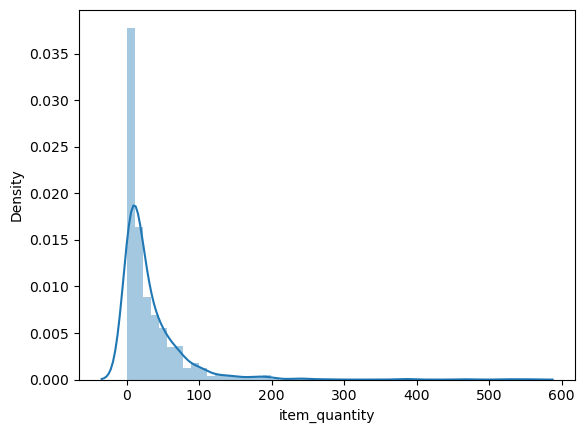

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df2.groupby('Customer_ID').agg({'item_quantity':'sum'})['item_quantity'])

In [17]:
d = df2.groupby('Customer_ID').agg({'item_quantity':'sum'}).reset_index_index()

In [18]:
d

,Customer_ID,item_quantity
0,10,23.0
1,11,6.0
2,12,42.0
3,13,31.0
4,14,54.0
...,...,...
1085,2796,43.0
1086,2799,30.0
1087,2800,19.0
1088,2801,30.0


In [19]:
df1['Customer_ID'].nunique()

3680

In [26]:
df = df1.merge(d, on = 'Customer_ID', how = 'left')

In [27]:
df

,Customer_ID,Account_Status,Is_National_Account,Is_Washington,Is_Tribal,Is_VLT,State_Code,Postal_Code,Country,Jurisdiction_Name,CBSA,Seasonality_Segment,Max_Quarter_Year_1,Max_Quarter_Year_2,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Parent_Influence_Slots_Bucket,item_quantity
0,1,Active,False,False,False,False,ON,L5N 2W8,CAN,AGCO - Ontario,None,None,None,None,None,None,None,None,None,None,None,Yes,High,High,M,NaN
1,2,Active,False,False,False,True,LA,70053,USA,None,"New Orleans-Metairie, LA",None,None,None,None,None,None,None,None,None,None,-,Medium,Medium,L,NaN
2,3,Active,False,False,False,True,LA,70068,USA,None,"New Orleans-Metairie, LA",None,None,None,None,None,None,None,None,None,None,-,Medium,Medium,L,NaN
3,4,Active,False,False,False,False,NV,89521,USA,None,"Reno, NV",None,None,None,None,None,None,None,None,None,None,Yes,High,High,No bucket,NaN
4,5,Active,False,False,False,False,NV,89431,USA,None,"Reno, NV",None,None,None,None,None,None,None,None,None,None,Yes,High,High,No bucket,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,3676,Inactive,False,False,False,True,IL,60563,USA,None,"Chicago-Naperville-Elgin, IL-IN-WI",None,None,None,None,None,None,None,None,None,None,Yes,High,Medium,L,NaN
3676,3677,Inactive,False,False,False,False,NV,89117,USA,None,"Las Vegas-Henderson-Paradise, NV",None,None,None,None,None,None,None,None,None,None,Yes,High,High,L,NaN
3677,3678,Inactive,False,False,False,False,MI,49969,USA,Michigan - Tribal,"Iron Mountain, MI-WI",None,None,None,None,None,None,None,None,None,None,-,Low,None,M,NaN
3678,3679,Active,False,False,False,False,No Address Found,None,No Address Found,Pennsylvania,None,None,None,None,None,None,None,None,None,None,None,-,-,-,M,NaN


In [30]:
df['target'] = 1
df.loc[(df['item_quantity'].isnull()), 'target']= 0

In [31]:
df['target'].value_counts()

target
0    2590
1    1090
Name: count, dtype: int64

In [32]:
col_list = list(df.columns)

In [33]:
col_list.remove('Customer_ID')

In [34]:
col_list

['Account_Status',
 'Is_National_Account',
 'Is_Washington',
 'Is_Tribal',
 'Is_VLT',
 'State_Code',
 'Postal_Code',
 'Country',
 'Jurisdiction_Name',
 'CBSA',
 'Seasonality_Segment',
 'Max_Quarter_Year_1',
 'Max_Quarter_Year_2',
 'EA_Segment',
 'Revenue_Bucket',
 'Profit_Bucket',
 'Market_Share_Segment',
 'Casino_Size_Segment',
 'Market_Potential_Segment',
 'Churn_Segment',
 'Competitiveness_Flag',
 'Volume_Segment',
 'Density_Segment',
 'Parent_Influence_Slots_Bucket',
 'item_quantity',
 'target']

In [35]:
df[col_list].nunique()

Account_Status                      5
Is_National_Account                 3
Is_Washington                       3
Is_Tribal                           3
Is_VLT                              3
State_Code                         60
Postal_Code                      1124
Country                            33
Jurisdiction_Name                 108
CBSA                              316
Seasonality_Segment                 4
Max_Quarter_Year_1                  5
Max_Quarter_Year_2                  5
EA_Segment                          4
Revenue_Bucket                      4
Profit_Bucket                       4
Market_Share_Segment                4
Casino_Size_Segment                 4
Market_Potential_Segment            5
Churn_Segment                       4
Competitiveness_Flag                2
Volume_Segment                      4
Density_Segment                     4
Parent_Influence_Slots_Bucket       3
item_quantity                     145
target                              2
dtype: int64

In [36]:
df['item_quantity'] = df['item_quantity'].fillna(0)

# General Information

In [37]:
def data_information(df, id_cols):
    ## Removing ID columns
    df = df.drop(columns=id_cols)

    ## Creating Empty Data Frame
    data_info = pd.DataFrame(np.random.randn(0, 12) * 0,
                             columns=['No. of Observations (Nrow)',
                                      'No. of Variables (Ncol)',
                                      'No. of Numeric Variables',
                                      'No. of Factor Variables',
                                      'No. of Categorical Variables',
                                      'No. of Logical Variables',
                                      'No. of Date Variables',
                                      'No. of Zero variance Variables (Uniform)',
                                      '% of Variables having complete cases',
                                      '% of Variables having <=50% missing cases',
                                      '% of Variables having >50% missing cases',
                                      '% of Variables having >90% missing cases'])

    ## Data Inofrmation
    data_info.loc[0, 'No. of Observations (Nrow)'] = df.shape[0]
    data_info.loc[0, 'No. of Variables (Ncol)'] = df.shape[1]
    data_info.loc[0, 'No. of Numeric Variables'] = df._get_numeric_data().shape[1]
    data_info.loc[0, 'No. of Factor Variables'] = df.select_dtypes(include='category').shape[1]
    data_info.loc[0, 'No. of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
    data_info.loc[0, 'No. of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
    data_info.loc[0, 'No. of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
    data_info.loc[0, 'No. of Zero variance Variables (Uniform)'] = df.loc[:, df.apply(pd.Series.nunique) == 1].shape[1]

    null_per = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_per.columns = ['null_per']

    data_info.loc[0, '% of Variables having complete cases'] = null_per[null_per.null_per == 0].shape[0] * 100 / \
                                                               df.shape[1]
    data_info.loc[0, '% of Variables having zero cases'] = null_per[null_per.null_per == 1].shape[0] * 100 / \
                                                                    df.shape[1]    
    data_info.loc[0, '% of Variables having <=50% missing cases'] = null_per[null_per.null_per <= 0.50].shape[0] * 100 / \
                                                                    df.shape[1]
    data_info.loc[0, '% of Variables having >50% missing cases'] = null_per[null_per.null_per > 0.50].shape[0] * 100 / \
                                                                   df.shape[1]
    data_info.loc[0, '% of Variables having >90% missing cases'] = null_per[null_per.null_per > 0.90].shape[0] * 100 / \
                                                                   df.shape[1]

    ## Transposing Data to get in consumable format
    data_info = data_info.transpose()
    data_info.columns = ['Value']
    data_info['Value'] = data_info['Value'].astype(int)

    return data_info

In [39]:
data_information(df, ['Customer_ID'])

,Value
No. of Observations (Nrow),3680
No. of Variables (Ncol),26
No. of Numeric Variables,2
No. of Factor Variables,0
No. of Categorical Variables,24
No. of Logical Variables,0
No. of Date Variables,0
No. of Zero variance Variables (Uniform),0
% of Variables having complete cases,80
% of Variables having <=50% missing cases,100


In [ ]:
# 80% variables have no missing observation and no varibale is having less than 50% missing cases

# Feat Analysis

In [42]:
cat_feat = []
for i in df.drop(columns=['Customer_ID']).select_dtypes(['object', 'bool']).columns:
    cat_feat.append(i)

len(cat_feat)

24

In [43]:
num_feat = []
for i in df.drop(columns=['Customer_ID'])._get_numeric_data().columns:
    num_feat.append(i)
    
len(num_feat)

2

In [44]:
num_feat

['item_quantity', 'target']

In [46]:
def cat_count_summary(df):

    df_cat = df[cat_feat]

    data_info_cat = pd.DataFrame()
    ## Counts Stats on Categorical Variable
    try:  ## incase Categorical variables not present
        for c in df_cat.columns:
            data_info_cat.loc[c, 'Unique Categories'] = len(df_cat[c].unique())
            data_info_cat.loc[c, 'Missing Percentage'] = (df_cat[df_cat[c].isnull()].shape[0]*100) / df_cat.shape[0]
    except:
        pass
    
    return data_info_cat

In [47]:
cat_count_summary(df)

,Unique Categories,Missing Percentage
Account_Status,5.0,0.000000
Is_National_Account,3.0,0.000000
Is_Washington,3.0,0.000000
Is_Tribal,3.0,0.000000
Is_VLT,3.0,0.000000
State_Code,61.0,8.369565
Postal_Code,1124.0,0.000000
Country,33.0,0.000000
Jurisdiction_Name,108.0,0.000000
CBSA,316.0,0.000000


# Feature Selection

In [48]:
# As proportion of missign values is not significant. We won't drop any feature based on missing observation.

#  Chi square for categorical

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

imp_feat_cat = []
for i in cat_feat:
    le = LabelEncoder()
    df.loc[(df[i].notnull()), i] = le.fit_transform(df[df[i].notnull()][i])
    
    chi_score = chi2(np.array(df[df[i].notnull()][i]).reshape(-1,1), df[df[i].notnull()]['target'])
    p_val = chi_score[1]
    if p_val <= 0.05:
        imp_feat_cat.append(i)

In [52]:
print(len(cat_feat))
print(len(imp_feat_cat))

24
21


In [55]:
# categorical vaible distinct value count
df[imp_feat_cat].nunique()

Account_Status                      5
Is_Washington                       3
Is_Tribal                           3
Is_VLT                              3
State_Code                         60
Postal_Code                      1124
Jurisdiction_Name                 108
CBSA                              316
Max_Quarter_Year_1                  5
Max_Quarter_Year_2                  5
EA_Segment                          4
Revenue_Bucket                      4
Profit_Bucket                       4
Market_Share_Segment                4
Casino_Size_Segment                 4
Market_Potential_Segment            5
Churn_Segment                       4
Competitiveness_Flag                2
Volume_Segment                      4
Density_Segment                     4
Parent_Influence_Slots_Bucket       3
dtype: int64

In [57]:
# feature with more that 10 catgory
imp_feat_cat_high = []
imp_feat_cat_low = []
for i in imp_feat_cat:
    if df[i].nunique()>10:
        imp_feat_cat_high.append(i)
    else:
        imp_feat_cat_low.append(i)
        
print(len(imp_feat_cat_high))
print(len(imp_feat_cat_low))

4
17


In [ ]:
# Replacing column with high no catgorries with median of quantity sold corresponding to that category


# Visual

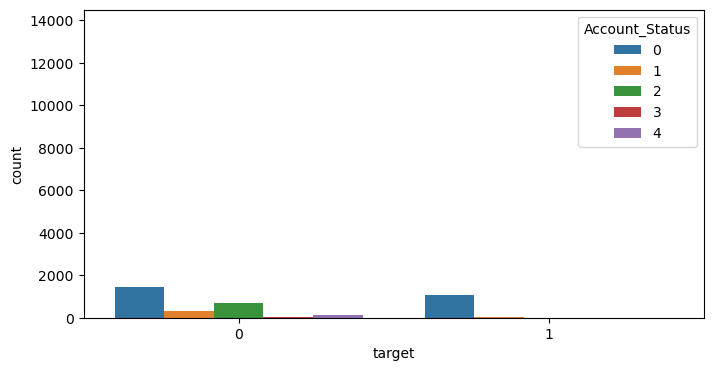

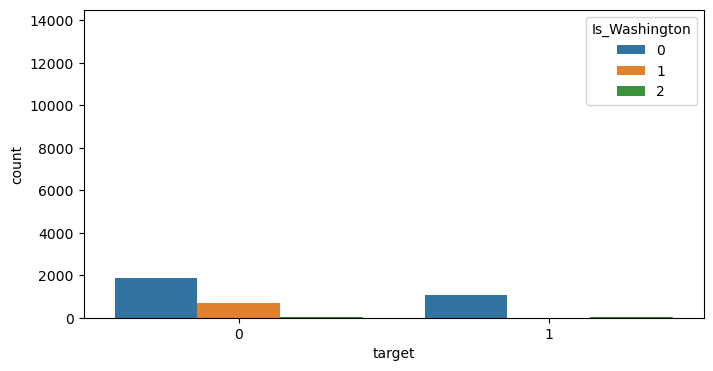

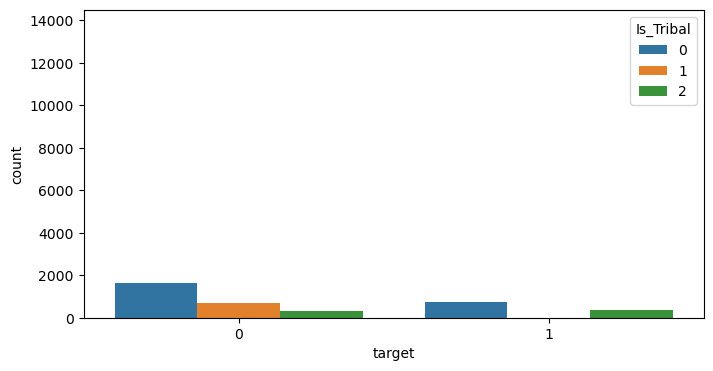

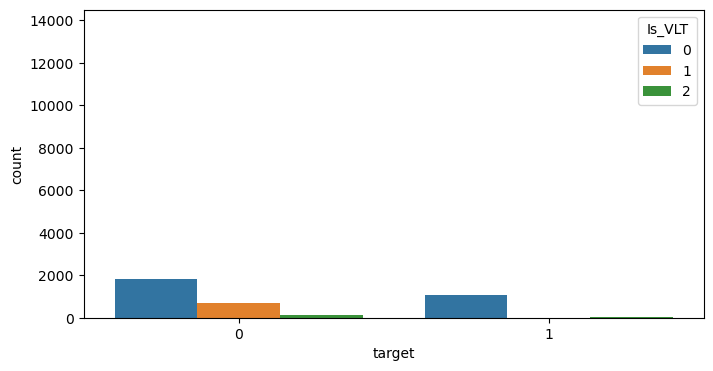

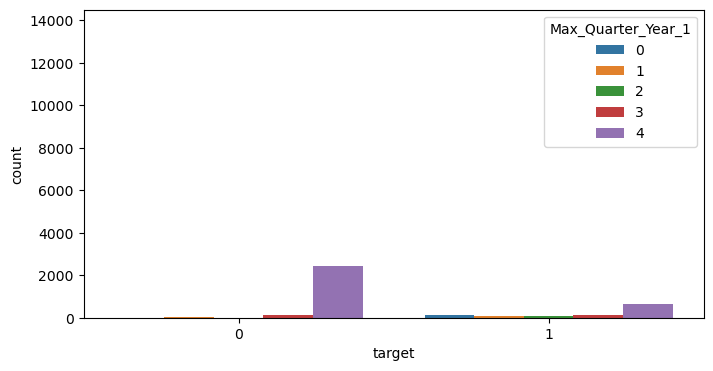

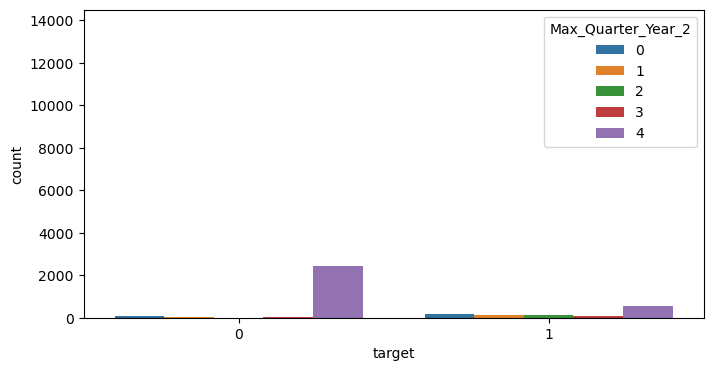

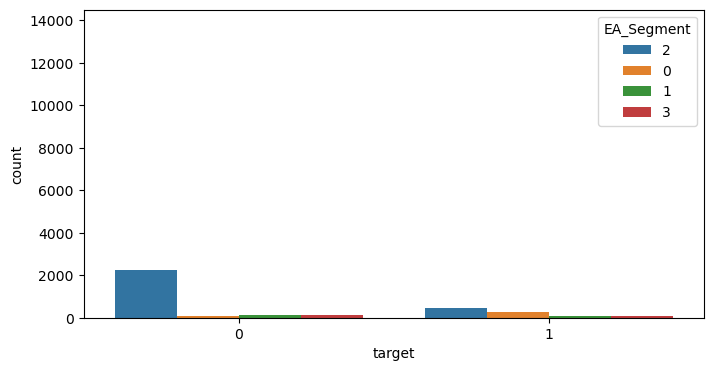

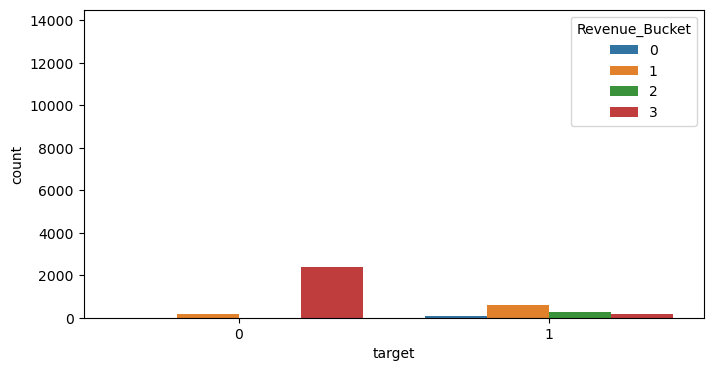

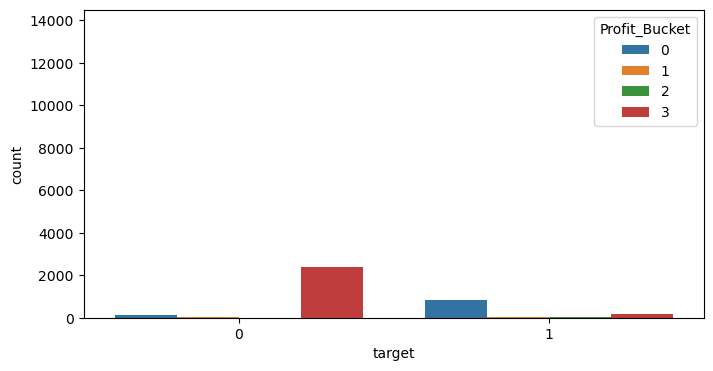

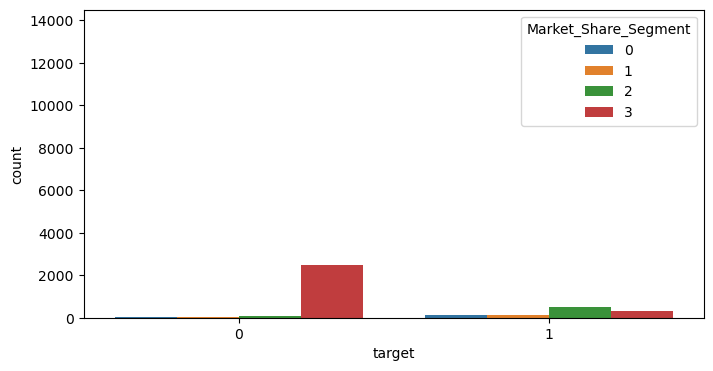

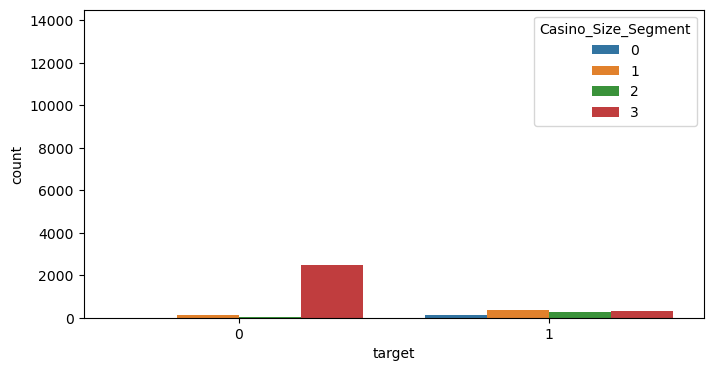

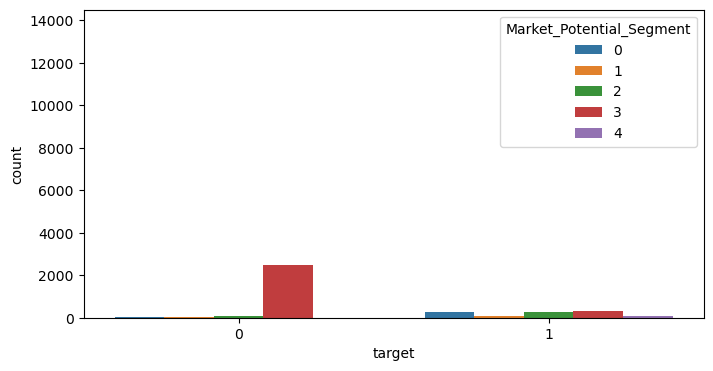

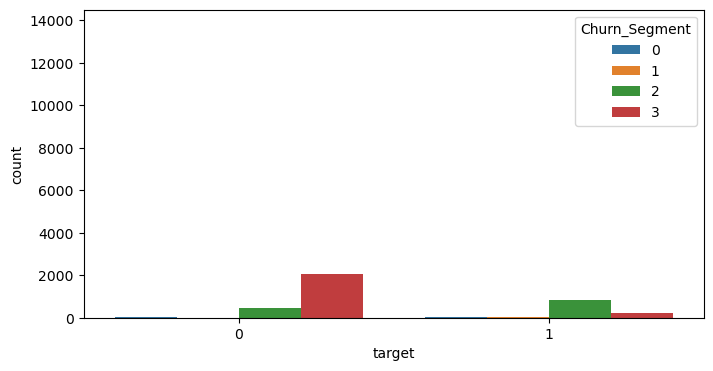

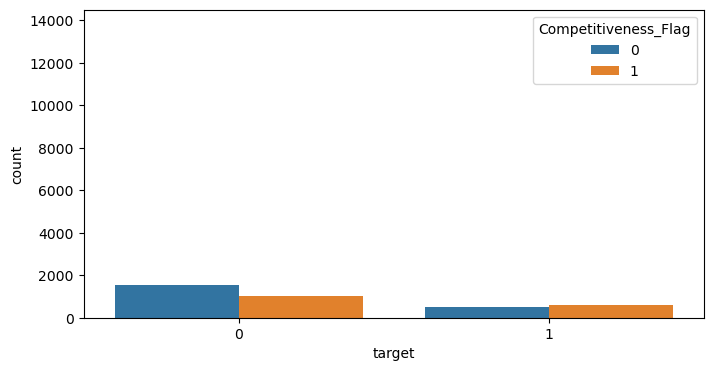

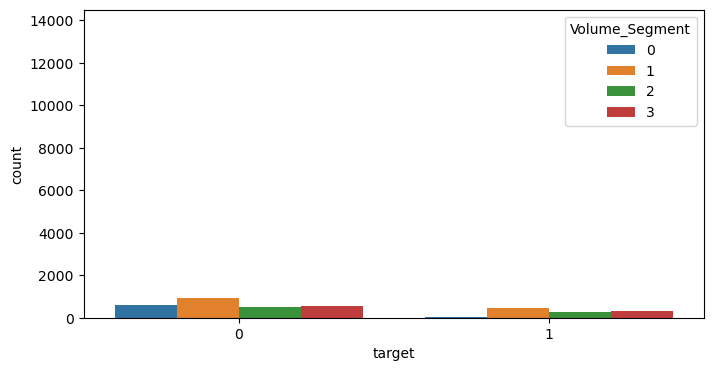

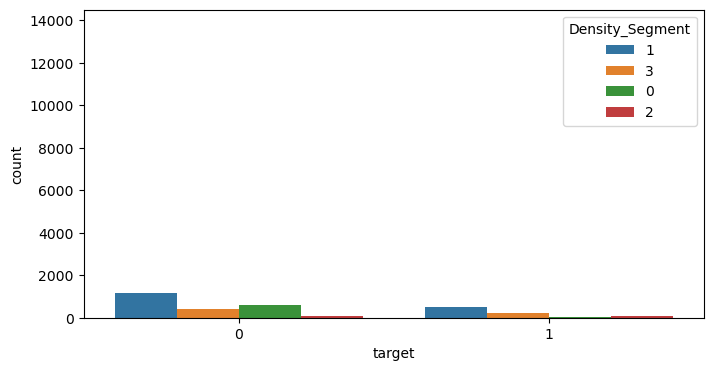

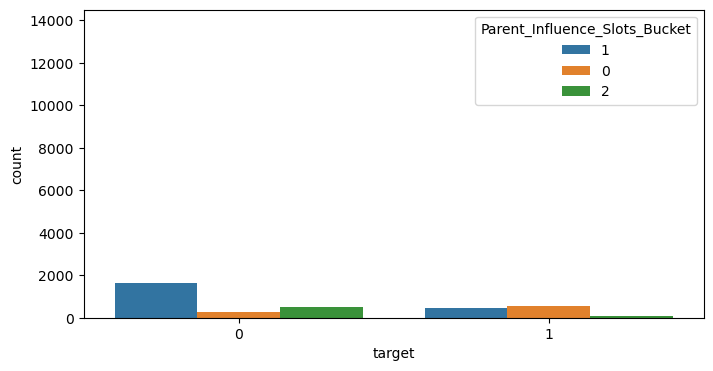

In [58]:
for i in imp_feat_cat_low:
    f, ax = plt.subplots(figsize=(8, 4))
    fig = sns.countplot(x='target', hue = i, data=df)
    fig.axis(ymin=0, ymax=14500)

# Handling missing values

In [73]:
df_copy = df.copy(deep=True)

In [120]:
missing_col = []
for i in imp_feat_cat:
    if df[i].isnull().sum()>0:
        missing_col.append(i)
        
print(missing_col)

['State_Code', 'EA_Segment', 'Density_Segment', 'Parent_Influence_Slots_Bucket']


In [121]:
# Replacing the null value with modes of corresponding variables
for i in missing_col:
    df.fillna(df[i].mode(), inplace=True)

In [136]:
df['Density_Segment'].unique()

array([1, 3, 0, 2, None], dtype=object)

In [123]:
df['Account_Status'].isnull().sum()

0

#Variabeles with low num of categories contains None value. We are consider that as a category

# Feature tratment for modelling

In [124]:
use_col = []
for i in imp_feat_cat_high:
    d = df.groupby(i).agg({'item_quantity':'median'}).reset_index().rename(columns = {'item_quantity':i+'_treated'})
    df = df.merge(d, on = i, how = 'left')
    use_col.append(i+'_treated')

In [125]:
use_col

['State_Code_treated',
 'Postal_Code_treated',
 'Jurisdiction_Name_treated',
 'CBSA_treated']

In [126]:
one_hot_enc = pd.get_dummies(df, columns=imp_feat_cat_low, dummy_na=True)

In [127]:
one_hot_enc = one_hot_enc.drop(columns = ['Is_National_Account', 'State_Code', 'Postal_Code',
       'Country', 'Jurisdiction_Name', 'CBSA', 'Seasonality_Segment',
       'item_quantity', 'target', 'State_Code_treated', 'Postal_Code_treated',
       'Jurisdiction_Name_treated', 'CBSA_treated'])

In [128]:
for i in one_hot_enc.drop(columns='Customer_ID').columns:
    one_hot_enc.loc[(one_hot_enc[i] == True), i] = 1
    one_hot_enc.loc[(one_hot_enc[i] == False), i] = 0
    use_col.append(i)

In [129]:
one_hot_enc

,Customer_ID,Account_Status_0.0,Account_Status_1.0,Account_Status_2.0,Account_Status_3.0,Account_Status_4.0,Account_Status_nan,Is_Washington_0.0,Is_Washington_1.0,Is_Washington_2.0,Is_Washington_nan,Is_Tribal_0.0,Is_Tribal_1.0,Is_Tribal_2.0,Is_Tribal_nan,Is_VLT_0.0,Is_VLT_1.0,Is_VLT_2.0,Is_VLT_nan,Max_Quarter_Year_1_0.0,Max_Quarter_Year_1_1.0,Max_Quarter_Year_1_2.0,Max_Quarter_Year_1_3.0,Max_Quarter_Year_1_4.0,Max_Quarter_Year_1_nan,Max_Quarter_Year_2_0.0,Max_Quarter_Year_2_1.0,Max_Quarter_Year_2_2.0,Max_Quarter_Year_2_3.0,Max_Quarter_Year_2_4.0,Max_Quarter_Year_2_nan,EA_Segment_0.0,EA_Segment_1.0,EA_Segment_2.0,EA_Segment_3.0,EA_Segment_nan,Revenue_Bucket_0.0,Revenue_Bucket_1.0,Revenue_Bucket_2.0,Revenue_Bucket_3.0,Revenue_Bucket_nan,Profit_Bucket_0.0,Profit_Bucket_1.0,Profit_Bucket_2.0,Profit_Bucket_3.0,Profit_Bucket_nan,Market_Share_Segment_0.0,Market_Share_Segment_1.0,Market_Share_Segment_2.0,Market_Share_Segment_3.0,Market_Share_Segment_nan,Casino_Size_Segment_0.0,Casino_Size_Segment_1.0,Casino_Size_Segment_2.0,Casino_Size_Segment_3.0,Casino_Size_Segment_nan,Market_Potential_Segment_0.0,Market_Potential_Segment_1.0,Market_Potential_Segment_2.0,Market_Potential_Segment_3.0,Market_Potential_Segment_4.0,Market_Potential_Segment_nan,Churn_Segment_0.0,Churn_Segment_1.0,Churn_Segment_2.0,Churn_Segment_3.0,Churn_Segment_nan,Competitiveness_Flag_0.0,Competitiveness_Flag_1.0,Competitiveness_Flag_nan,Volume_Segment_0.0,Volume_Segment_1.0,Volume_Segment_2.0,Volume_Segment_3.0,Volume_Segment_nan,Density_Segment_0.0,Density_Segment_1.0,Density_Segment_2.0,Density_Segment_3.0,Density_Segment_nan,Parent_Influence_Slots_Bucket_0.0,Parent_Influence_Slots_Bucket_1.0,Parent_Influence_Slots_Bucket_2.0,Parent_Influence_Slots_Bucket_nan
0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,3676,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3676,3677,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3677,3678,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3678,3679,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [130]:
use_col

['State_Code_treated',
 'Postal_Code_treated',
 'Jurisdiction_Name_treated',
 'CBSA_treated',
 'Account_Status_0.0',
 'Account_Status_1.0',
 'Account_Status_2.0',
 'Account_Status_3.0',
 'Account_Status_4.0',
 'Account_Status_nan',
 'Is_Washington_0.0',
 'Is_Washington_1.0',
 'Is_Washington_2.0',
 'Is_Washington_nan',
 'Is_Tribal_0.0',
 'Is_Tribal_1.0',
 'Is_Tribal_2.0',
 'Is_Tribal_nan',
 'Is_VLT_0.0',
 'Is_VLT_1.0',
 'Is_VLT_2.0',
 'Is_VLT_nan',
 'Max_Quarter_Year_1_0.0',
 'Max_Quarter_Year_1_1.0',
 'Max_Quarter_Year_1_2.0',
 'Max_Quarter_Year_1_3.0',
 'Max_Quarter_Year_1_4.0',
 'Max_Quarter_Year_1_nan',
 'Max_Quarter_Year_2_0.0',
 'Max_Quarter_Year_2_1.0',
 'Max_Quarter_Year_2_2.0',
 'Max_Quarter_Year_2_3.0',
 'Max_Quarter_Year_2_4.0',
 'Max_Quarter_Year_2_nan',
 'EA_Segment_0.0',
 'EA_Segment_1.0',
 'EA_Segment_2.0',
 'EA_Segment_3.0',
 'EA_Segment_nan',
 'Revenue_Bucket_0.0',
 'Revenue_Bucket_1.0',
 'Revenue_Bucket_2.0',
 'Revenue_Bucket_3.0',
 'Revenue_Bucket_nan',
 'Profit_Bucke

In [112]:
df['Competitiveness_Flag'].isnull().sum()

0

In [135]:
df['Account_Status'].unique()

array([0, 1, 3, 4, 2], dtype=object)

In [138]:
df = df.merge(one_hot_enc, on = 'Customer_ID', how = 'left')

In [139]:
df

,Customer_ID,Account_Status,Is_National_Account,Is_Washington,Is_Tribal,Is_VLT,State_Code,Postal_Code,Country,Jurisdiction_Name,CBSA,Seasonality_Segment,Max_Quarter_Year_1,Max_Quarter_Year_2,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Parent_Influence_Slots_Bucket,item_quantity,target,State_Code_treated,Postal_Code_treated,Jurisdiction_Name_treated,CBSA_treated,Account_Status_0.0,Account_Status_1.0,Account_Status_2.0,Account_Status_3.0,Account_Status_4.0,Account_Status_nan,Is_Washington_0.0,Is_Washington_1.0,Is_Washington_2.0,Is_Washington_nan,Is_Tribal_0.0,Is_Tribal_1.0,Is_Tribal_2.0,Is_Tribal_nan,Is_VLT_0.0,Is_VLT_1.0,Is_VLT_2.0,Is_VLT_nan,Max_Quarter_Year_1_0.0,Max_Quarter_Year_1_1.0,Max_Quarter_Year_1_2.0,Max_Quarter_Year_1_3.0,Max_Quarter_Year_1_4.0,Max_Quarter_Year_1_nan,Max_Quarter_Year_2_0.0,Max_Quarter_Year_2_1.0,Max_Quarter_Year_2_2.0,Max_Quarter_Year_2_3.0,Max_Quarter_Year_2_4.0,Max_Quarter_Year_2_nan,EA_Segment_0.0,EA_Segment_1.0,EA_Segment_2.0,EA_Segment_3.0,EA_Segment_nan,Revenue_Bucket_0.0,Revenue_Bucket_1.0,Revenue_Bucket_2.0,Revenue_Bucket_3.0,Revenue_Bucket_nan,Profit_Bucket_0.0,Profit_Bucket_1.0,Profit_Bucket_2.0,Profit_Bucket_3.0,Profit_Bucket_nan,Market_Share_Segment_0.0,Market_Share_Segment_1.0,Market_Share_Segment_2.0,Market_Share_Segment_3.0,Market_Share_Segment_nan,Casino_Size_Segment_0.0,Casino_Size_Segment_1.0,Casino_Size_Segment_2.0,Casino_Size_Segment_3.0,Casino_Size_Segment_nan,Market_Potential_Segment_0.0,Market_Potential_Segment_1.0,Market_Potential_Segment_2.0,Market_Potential_Segment_3.0,Market_Potential_Segment_4.0,Market_Potential_Segment_nan,Churn_Segment_0.0,Churn_Segment_1.0,Churn_Segment_2.0,Churn_Segment_3.0,Churn_Segment_nan,Competitiveness_Flag_0.0,Competitiveness_Flag_1.0,Competitiveness_Flag_nan,Volume_Segment_0.0,Volume_Segment_1.0,Volume_Segment_2.0,Volume_Segment_3.0,Volume_Segment_nan,Density_Segment_0.0,Density_Segment_1.0,Density_Segment_2.0,Density_Segment_3.0,Density_Segment_nan,Parent_Influence_Slots_Bucket_0.0,Parent_Influence_Slots_Bucket_1.0,Parent_Influence_Slots_Bucket_2.0,Parent_Influence_Slots_Bucket_nan
0,1,0,0,0,0,0,43,1008,8,0,192,2,4,4,2,3,3,3,3,3,3,1,1,1,1,0.0,0,10.0,0.0,10.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2,0,0,0,0,2,19,480,30,67,187,None,4,4,2,3,3,3,3,3,3,0,3,3,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,3,0,0,0,0,2,19,483,30,67,187,2,4,4,2,3,3,3,3,3,3,0,3,3,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,4,0,0,0,0,0,38,819,30,67,233,2,4,4,2,3,3,3,3,3,3,1,1,1,2,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5,0,0,0,0,0,38,796,30,67,233,2,4,4,2,3,3,3,3,3,3,1,1,1,2,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,3676,1,0,0,0,2,15,415,30,67,50,2,4,4,2,3,3,3,3,3,3,1,1,3,0,0.0,0,0.

# Train Test split

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[use_col], df['target'], test_size=0.25, stratify=df['target'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2760, 87)
(920, 87)
(2760,)
(920,)


In [142]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')
y_train = y_train.astype('float')
y_test =y_test.astype('float')

In [144]:
X_train = X_train.replace([np.nan, np.inf], -999)
X_test = X_test.replace([np.nan, np.inf], -999)

# Modelling 

# Training logistic regression model

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_train_pred_prob = lr.predict_proba(X_train)
y_test_pred = lr.predict(X_test)
y_test_pred_prob = lr.predict_proba(X_test)

print('Train')
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

Train
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1943
         1.0       0.91      0.82      0.86       817

    accuracy                           0.92      2760
   macro avg       0.92      0.89      0.90      2760
weighted avg       0.92      0.92      0.92      2760

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       647
         1.0       0.90      0.78      0.84       273

    accuracy                           0.91       920
   macro avg       0.91      0.87      0.89       920
weighted avg       0.91      0.91      0.91       920



C:\Users\HP\anaconda3_1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
print('Train AUC: ', roc_auc_score(y_train, [i[1] for i in y_train_pred_prob]))
print('Test AUC: ', roc_auc_score(y_test, [i[1] for i in y_test_pred_prob]))

Train AUC:  0.9712500889802456
Test AUC:  0.9541671620496968


Text(33.22222222222222, 0.5, 'actual')

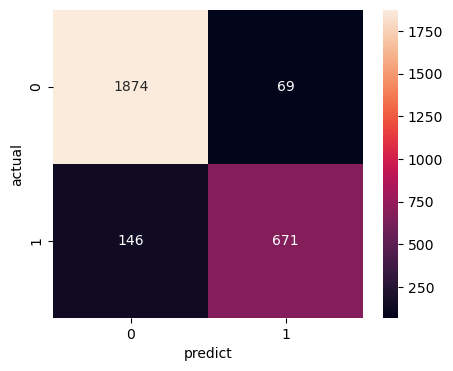

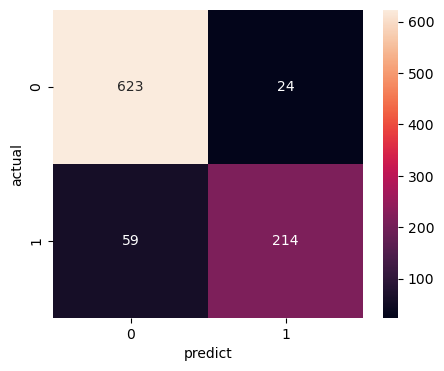

In [159]:
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

<Axes: ylabel='Feature'>

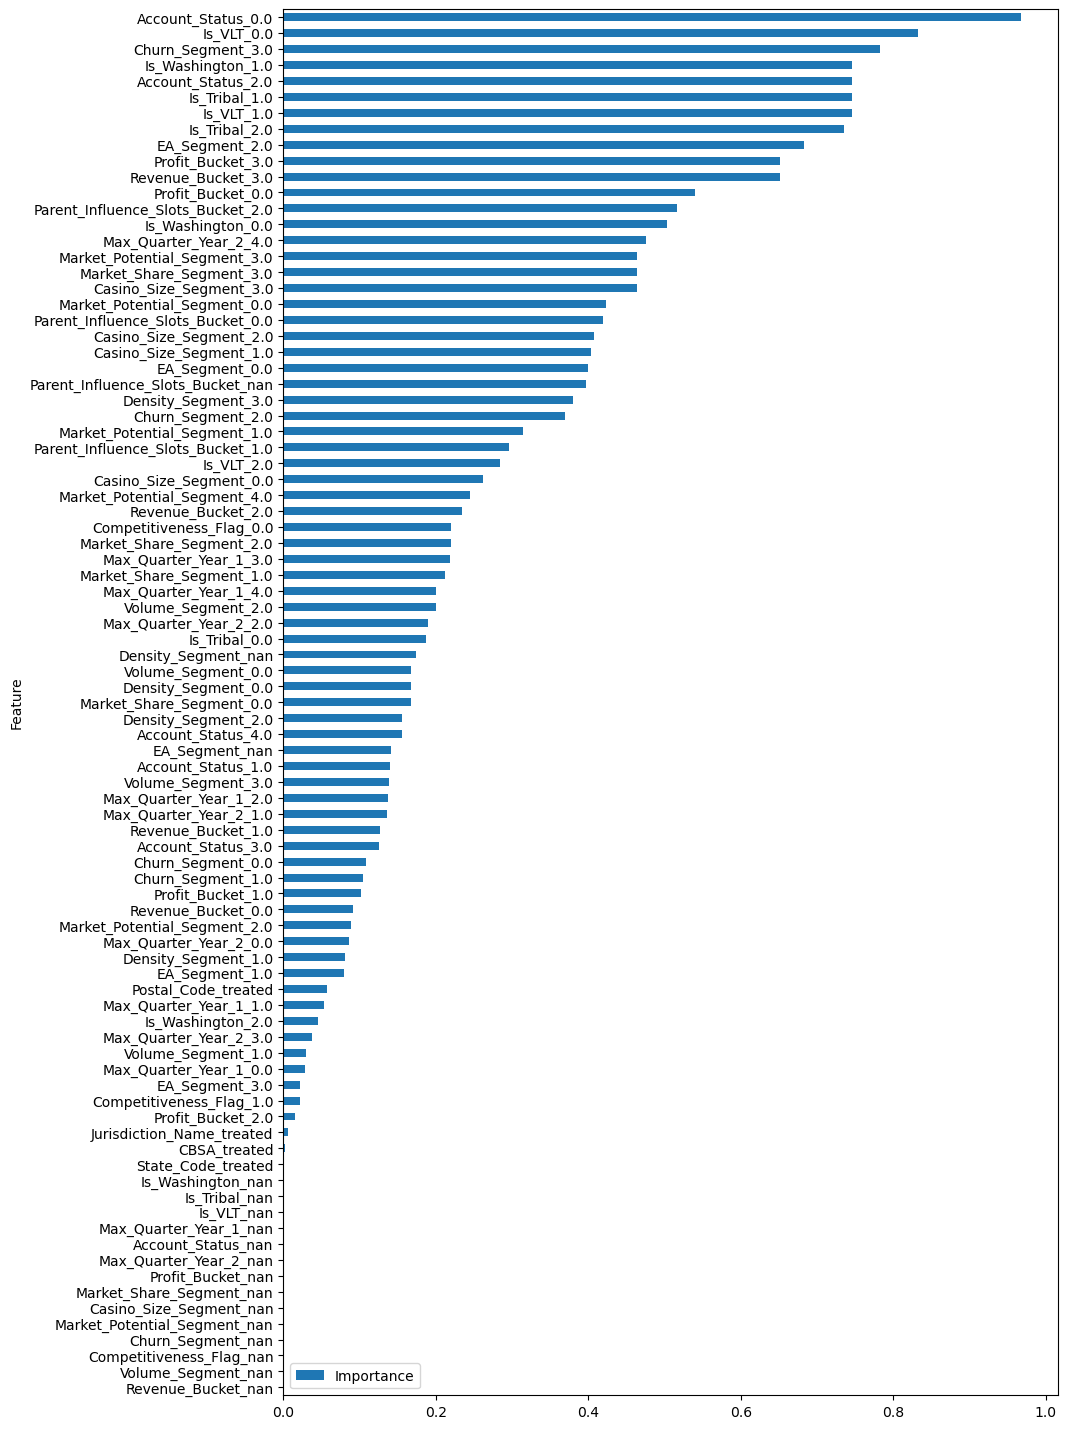

In [164]:
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 18))

In [165]:
feature_importance

,Feature,Importance
43,Revenue_Bucket_nan,0.000000
77,Volume_Segment_nan,0.000000
72,Competitiveness_Flag_nan,0.000000
69,Churn_Segment_nan,0.000000
64,Market_Potential_Segment_nan,0.000000
...,...,...
6,Account_Status_2.0,0.746488
11,Is_Washington_1.0,0.746488
68,Churn_Segment_3.0,0.782501
18,Is_VLT_0.0,0.831945


In [168]:
lr_imp_cols = list(feature_importance[feature_importance['Importance']>0.2]['Feature'])

In [169]:
len(lr_imp_cols)

38

# Training logistic regression model with feature having importance more than 0.2

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train[lr_imp_cols], y_train)
y_train_pred = lr.predict(X_train[lr_imp_cols])
y_train_pred_prob = lr.predict_proba(X_train[lr_imp_cols])
y_test_pred = lr.predict(X_test[lr_imp_cols])
y_test_pred_prob = lr.predict_proba(X_test[lr_imp_cols])

print('Train')
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

Train
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1943
         1.0       0.91      0.83      0.87       817

    accuracy                           0.93      2760
   macro avg       0.92      0.90      0.91      2760
weighted avg       0.92      0.93      0.92      2760

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       647
         1.0       0.91      0.79      0.85       273

    accuracy                           0.92       920
   macro avg       0.91      0.88      0.89       920
weighted avg       0.92      0.92      0.91       920



In [172]:
print('Train AUC: ', roc_auc_score(y_train, [i[1] for i in y_train_pred_prob]))
print('Test AUC: ', roc_auc_score(y_test, [i[1] for i in y_test_pred_prob]))

Train AUC:  0.9655248007629937
Test AUC:  0.9502975128941125


Text(33.22222222222222, 0.5, 'actual')

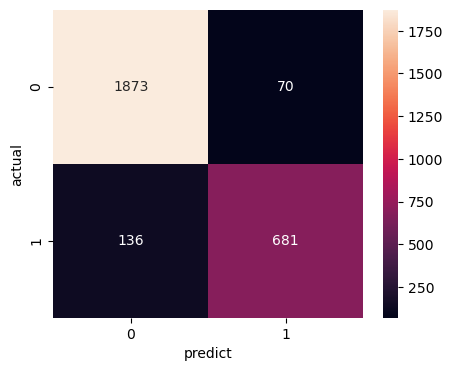

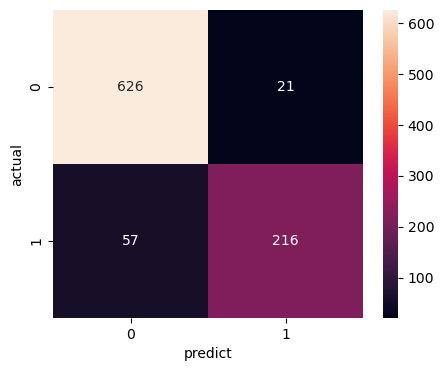

In [173]:
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

<Axes: ylabel='Feature'>

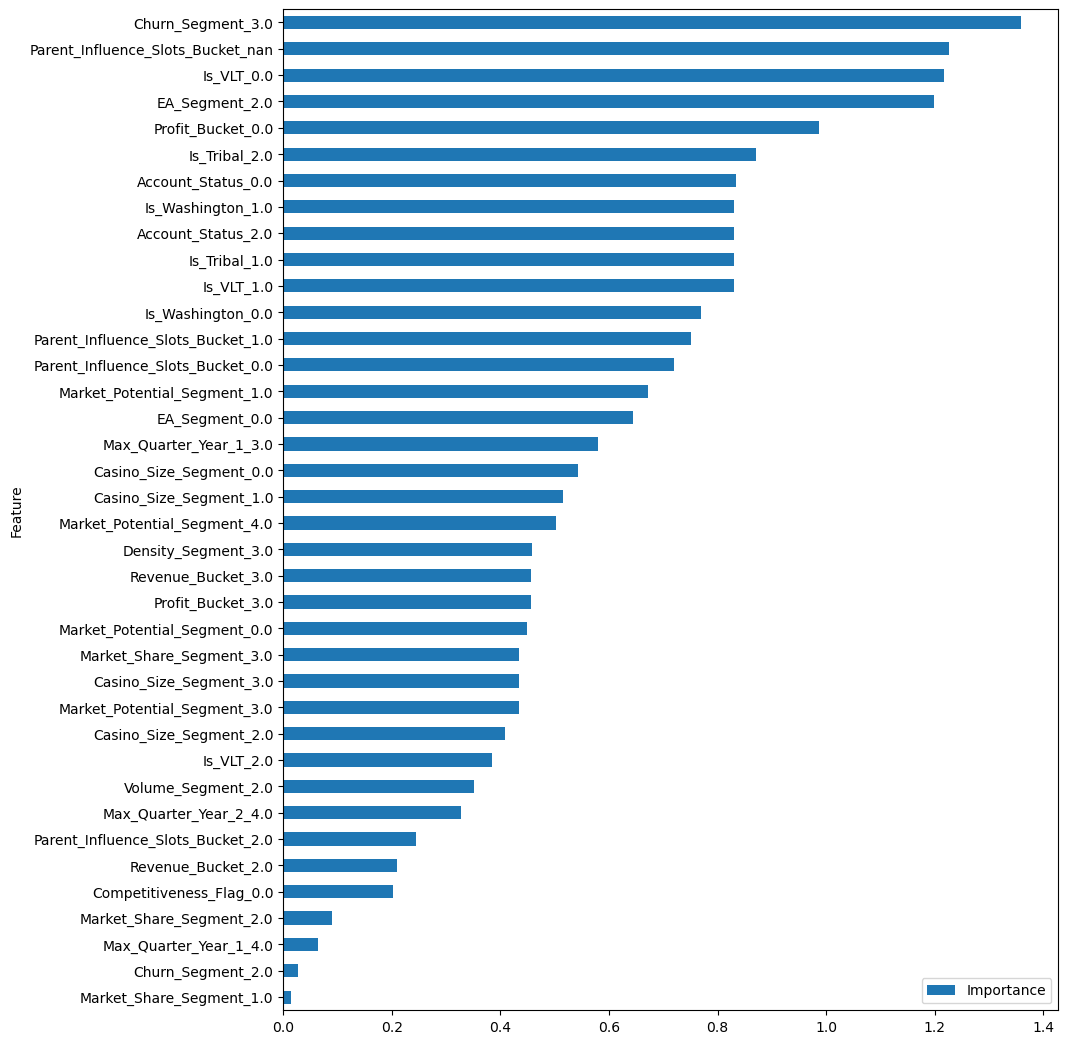

In [175]:
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': lr_imp_cols, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 13))

In [184]:
feature_importance

,Feature,Importance
2,Market_Share_Segment_1.0,0.014889
12,Churn_Segment_2.0,0.027829
1,Max_Quarter_Year_1_4.0,0.063313
4,Market_Share_Segment_2.0,0.090551
5,Competitiveness_Flag_0.0,0.201186
6,Revenue_Bucket_2.0,0.210250
25,Parent_Influence_Slots_Bucket_2.0,0.244774
23,Max_Quarter_Year_2_4.0,0.328196
0,Volume_Segment_2.0,0.350781
9,Is_VLT_2.0,0.385277


In [185]:
lr_imp_cols1 = list(feature_importance[feature_importance['Importance']>0.2]['Feature'])
print(len(lr_imp_cols1))

34


# Again Training logistic regression model with feature having importance more than 0.2

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train[lr_imp_cols1], y_train)
y_train_pred = lr.predict(X_train[lr_imp_cols1])
y_train_pred_prob = lr.predict_proba(X_train[lr_imp_cols1])
y_test_pred = lr.predict(X_test[lr_imp_cols1])
y_test_pred_prob = lr.predict_proba(X_test[lr_imp_cols1])

print('Train')
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

Train
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1943
         1.0       0.91      0.83      0.87       817

    accuracy                           0.93      2760
   macro avg       0.92      0.90      0.91      2760
weighted avg       0.92      0.93      0.92      2760

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       647
         1.0       0.91      0.79      0.85       273

    accuracy                           0.92       920
   macro avg       0.91      0.88      0.89       920
weighted avg       0.92      0.92      0.91       920



In [187]:
print('Train AUC: ', roc_auc_score(y_train, [i[1] for i in y_train_pred_prob]))
print('Test AUC: ', roc_auc_score(y_test, [i[1] for i in y_test_pred_prob]))

Train AUC:  0.9652507731044686
Test AUC:  0.9504815123053144


Text(33.22222222222222, 0.5, 'actual')

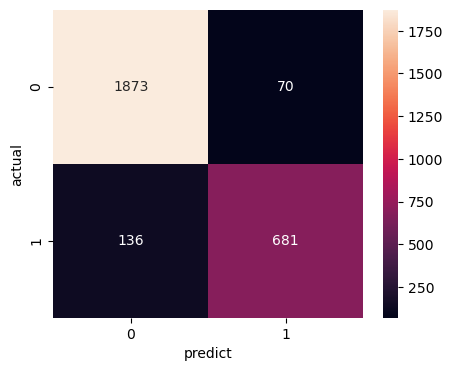

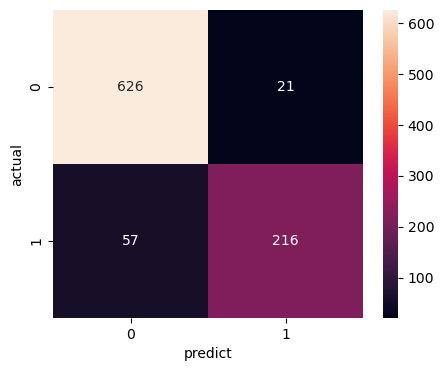

In [188]:
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

<Axes: ylabel='Feature'>

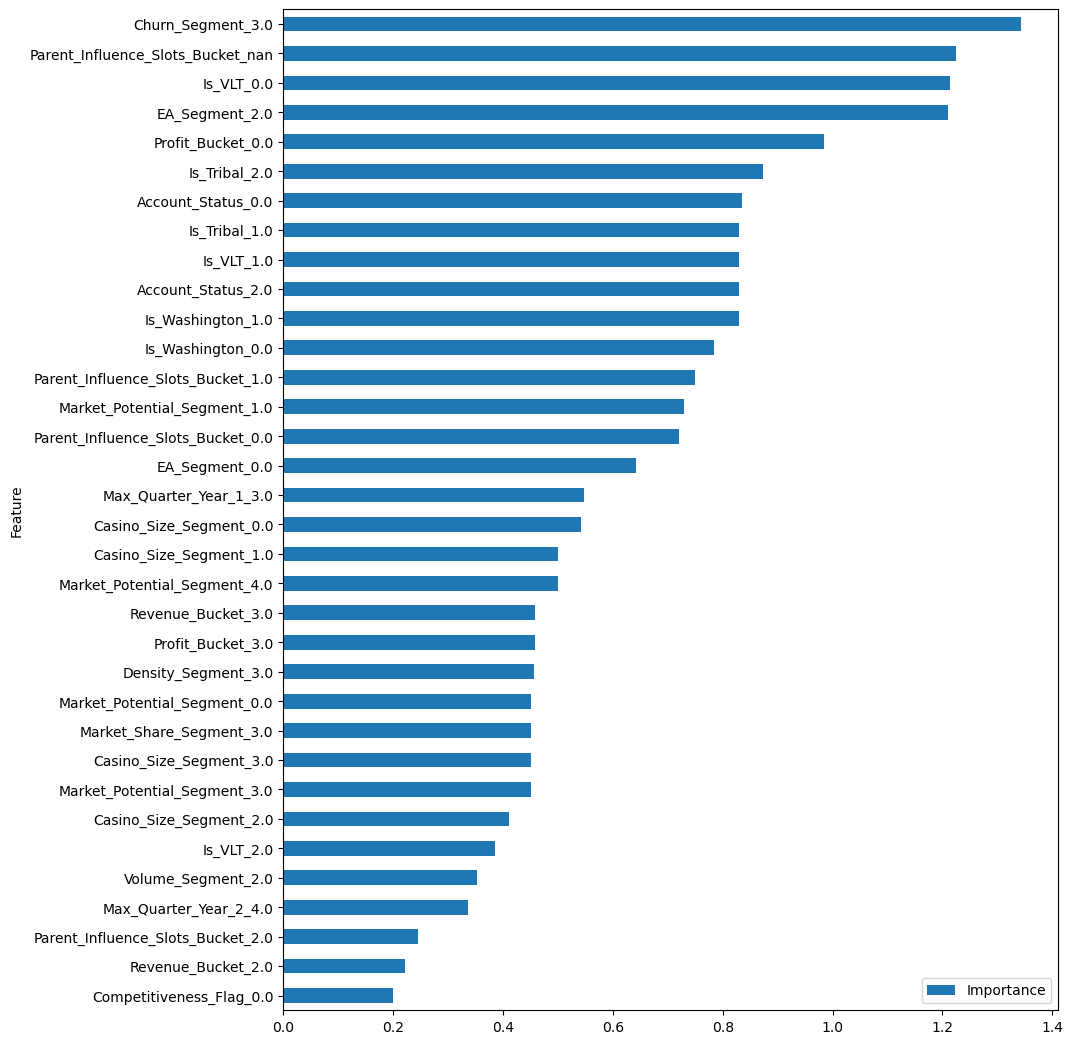

In [190]:
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': lr_imp_cols1, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 13))

In [191]:
feature_importance

,Feature,Importance
0,Competitiveness_Flag_0.0,0.200587
1,Revenue_Bucket_2.0,0.221606
2,Parent_Influence_Slots_Bucket_2.0,0.245957
3,Max_Quarter_Year_2_4.0,0.336899
4,Volume_Segment_2.0,0.351819
5,Is_VLT_2.0,0.384868
6,Casino_Size_Segment_2.0,0.410058
7,Market_Potential_Segment_3.0,0.450899
8,Casino_Size_Segment_3.0,0.450899
9,Market_Share_Segment_3.0,0.450899


In [192]:
len(lr_imp_cols1)

34

# SVM model

In [178]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_train_pred = svc.predict(X_train)
y_train_pred_prob = svc.predict_proba(X_train)
y_test_pred = svc.predict(X_test)
y_test_pred_prob = svc.predict_proba(X_test)

print('Train')
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

Train
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88      1943
         1.0       0.88      0.43      0.58       817

    accuracy                           0.81      2760
   macro avg       0.84      0.70      0.73      2760
weighted avg       0.83      0.81      0.79      2760

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.87       647
         1.0       0.84      0.35      0.49       273

    accuracy                           0.79       920
   macro avg       0.81      0.66      0.68       920
weighted avg       0.80      0.79      0.75       920



In [179]:
print('Train AUC: ', roc_auc_score(y_train, [i[1] for i in y_train_pred_prob]))
print('Test AUC: ', roc_auc_score(y_test, [i[1] for i in y_test_pred_prob]))

Train AUC:  0.9218973927055727
Test AUC:  0.9101941335326189


Text(33.22222222222222, 0.5, 'actual')

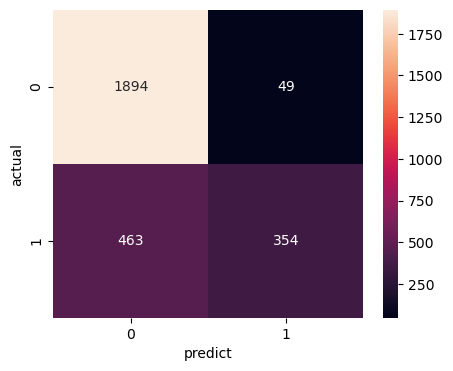

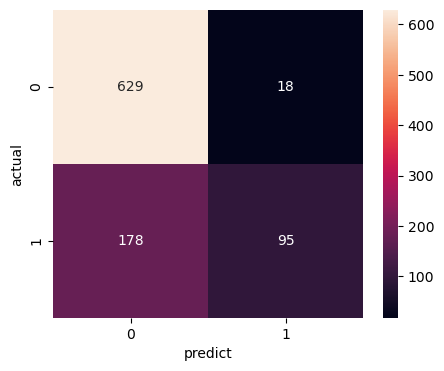

In [180]:
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

# As SVM model performance is low in comparison to Logistic Regression model, Finalizing the Logistic Regression model with 34 variable

# For scoring customer we will use probability score by logistic Regression Model

In [194]:
# Test data Score
X_test['prob_score_lr_34'] = [i[1]*100 for i in lr.predict_proba(X_test[lr_imp_cols1])]

In [195]:
X_test

,State_Code_treated,Postal_Code_treated,Jurisdiction_Name_treated,CBSA_treated,Account_Status_0.0,Account_Status_1.0,Account_Status_2.0,Account_Status_3.0,Account_Status_4.0,Account_Status_nan,Is_Washington_0.0,Is_Washington_1.0,Is_Washington_2.0,Is_Washington_nan,Is_Tribal_0.0,Is_Tribal_1.0,Is_Tribal_2.0,Is_Tribal_nan,Is_VLT_0.0,Is_VLT_1.0,Is_VLT_2.0,Is_VLT_nan,Max_Quarter_Year_1_0.0,Max_Quarter_Year_1_1.0,Max_Quarter_Year_1_2.0,Max_Quarter_Year_1_3.0,Max_Quarter_Year_1_4.0,Max_Quarter_Year_1_nan,Max_Quarter_Year_2_0.0,Max_Quarter_Year_2_1.0,Max_Quarter_Year_2_2.0,Max_Quarter_Year_2_3.0,Max_Quarter_Year_2_4.0,Max_Quarter_Year_2_nan,EA_Segment_0.0,EA_Segment_1.0,EA_Segment_2.0,EA_Segment_3.0,EA_Segment_nan,Revenue_Bucket_0.0,Revenue_Bucket_1.0,Revenue_Bucket_2.0,Revenue_Bucket_3.0,Revenue_Bucket_nan,Profit_Bucket_0.0,Profit_Bucket_1.0,Profit_Bucket_2.0,Profit_Bucket_3.0,Profit_Bucket_nan,Market_Share_Segment_0.0,Market_Share_Segment_1.0,Market_Share_Segment_2.0,Market_Share_Segment_3.0,Market_Share_Segment_nan,Casino_Size_Segment_0.0,Casino_Size_Segment_1.0,Casino_Size_Segment_2.0,Casino_Size_Segment_3.0,Casino_Size_Segment_nan,Market_Potential_Segment_0.0,Market_Potential_Segment_1.0,Market_Potential_Segment_2.0,Market_Potential_Segment_3.0,Market_Potential_Segment_4.0,Market_Potential_Segment_nan,Churn_Segment_0.0,Churn_Segment_1.0,Churn_Segment_2.0,Churn_Segment_3.0,Churn_Segment_nan,Competitiveness_Flag_0.0,Competitiveness_Flag_1.0,Competitiveness_Flag_nan,Volume_Segment_0.0,Volume_Segment_1.0,Volume_Segment_2.0,Volume_Segment_3.0,Volume_Segment_nan,Density_Segment_0.0,Density_Segment_1.0,Density_Segment_2.0,Density_Segment_3.0,Density_Segment_nan,Parent_Influence_Slots_Bucket_0.0,Parent_Influence_Slots_Bucket_1.0,Parent_Influence_Slots_Bucket_2.0,Parent_Influence_Slots_Bucket_nan,prob_score_lr_34
2659,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.038880
1986,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.098735
636,0.0,4.5,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.032040
1068,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.038880
1562,0.0,8.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.893920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94

# Tree based approach

In [ ]:
#In Tree based apporach we use labele encoding instead of one-hot-encoding for all the features.

In [200]:
imp_feat_cat

['Account_Status',
 'Is_Washington',
 'Is_Tribal',
 'Is_VLT',
 'State_Code',
 'Postal_Code',
 'Jurisdiction_Name',
 'CBSA',
 'Max_Quarter_Year_1',
 'Max_Quarter_Year_2',
 'EA_Segment',
 'Revenue_Bucket',
 'Profit_Bucket',
 'Market_Share_Segment',
 'Casino_Size_Segment',
 'Market_Potential_Segment',
 'Churn_Segment',
 'Competitiveness_Flag',
 'Volume_Segment',
 'Density_Segment',
 'Parent_Influence_Slots_Bucket']

In [201]:
imp_feat_cat_high

['State_Code', 'Postal_Code', 'Jurisdiction_Name', 'CBSA']

In [203]:
imp_feat_cat_low

['Account_Status',
 'Is_Washington',
 'Is_Tribal',
 'Is_VLT',
 'Max_Quarter_Year_1',
 'Max_Quarter_Year_2',
 'EA_Segment',
 'Revenue_Bucket',
 'Profit_Bucket',
 'Market_Share_Segment',
 'Casino_Size_Segment',
 'Market_Potential_Segment',
 'Churn_Segment',
 'Competitiveness_Flag',
 'Volume_Segment',
 'Density_Segment',
 'Parent_Influence_Slots_Bucket']

#All the feature are already present as labels so directly proceeding

In [208]:
for i in imp_feat_cat_low:
    print(i, df[i].unique())

Account_Status [0 1 3 4 2]
Is_Washington [0 2 1]
Is_Tribal [0 2 1]
Is_VLT [0 2 1]
Max_Quarter_Year_1 [4 1 3 2 0]
Max_Quarter_Year_2 [4 3 0 1 2]
EA_Segment [2 None 0 1 3]
Revenue_Bucket [3 1 2 0]
Profit_Bucket [3 0 1 2]
Market_Share_Segment [3 1 2 0]
Casino_Size_Segment [3 1 2 0]
Market_Potential_Segment [3 2 0 1 4]
Churn_Segment [3 2 1 0]
Competitiveness_Flag [1 0]
Volume_Segment [1 3 0 2]
Density_Segment [1 3 0 2 None]
Parent_Influence_Slots_Bucket [1 0 2 None]


# Train Test split

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[imp_feat_cat], df['target'], test_size=0.25, stratify=df['target'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train = X_train.astype('float')
X_test = X_test.astype('float')
y_train = y_train.astype('float')
y_test =y_test.astype('float')

X_train = X_train.replace([np.nan, np.inf], -999)
X_test = X_test.replace([np.nan, np.inf], -999)

(2760, 21)
(920, 21)
(2760,)
(920,)


# Decision Tree

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_train_pred_prob = dt.predict_proba(X_train)
y_test_pred = dt.predict(X_test)
y_test_pred_prob = dt.predict_proba(X_test)

print('Train')
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

Train
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1942
         1.0       0.93      0.84      0.88       818

    accuracy                           0.93      2760
   macro avg       0.93      0.91      0.92      2760
weighted avg       0.93      0.93      0.93      2760

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       648
         1.0       0.89      0.81      0.85       272

    accuracy                           0.92       920
   macro avg       0.91      0.88      0.90       920
weighted avg       0.91      0.92      0.91       920



In [219]:
print('Train AUC: ', roc_auc_score(y_train, [i[1] for i in y_train_pred_prob]))
print('Test AUC: ', roc_auc_score(y_test, [i[1] for i in y_test_pred_prob]))

Train AUC:  0.9569193657636242
Test AUC:  0.9246635575526507


Text(33.22222222222222, 0.5, 'actual')

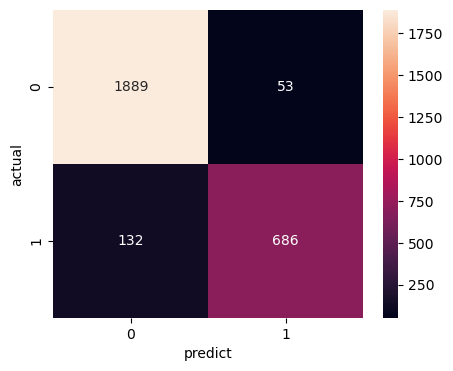

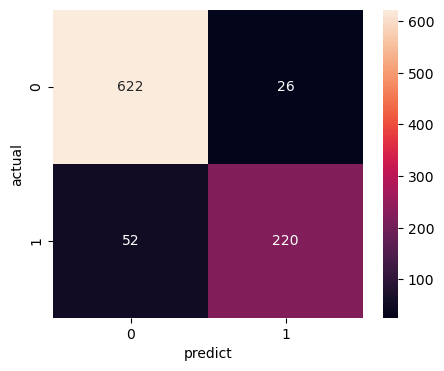

In [220]:
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

<Axes: ylabel='Feature'>

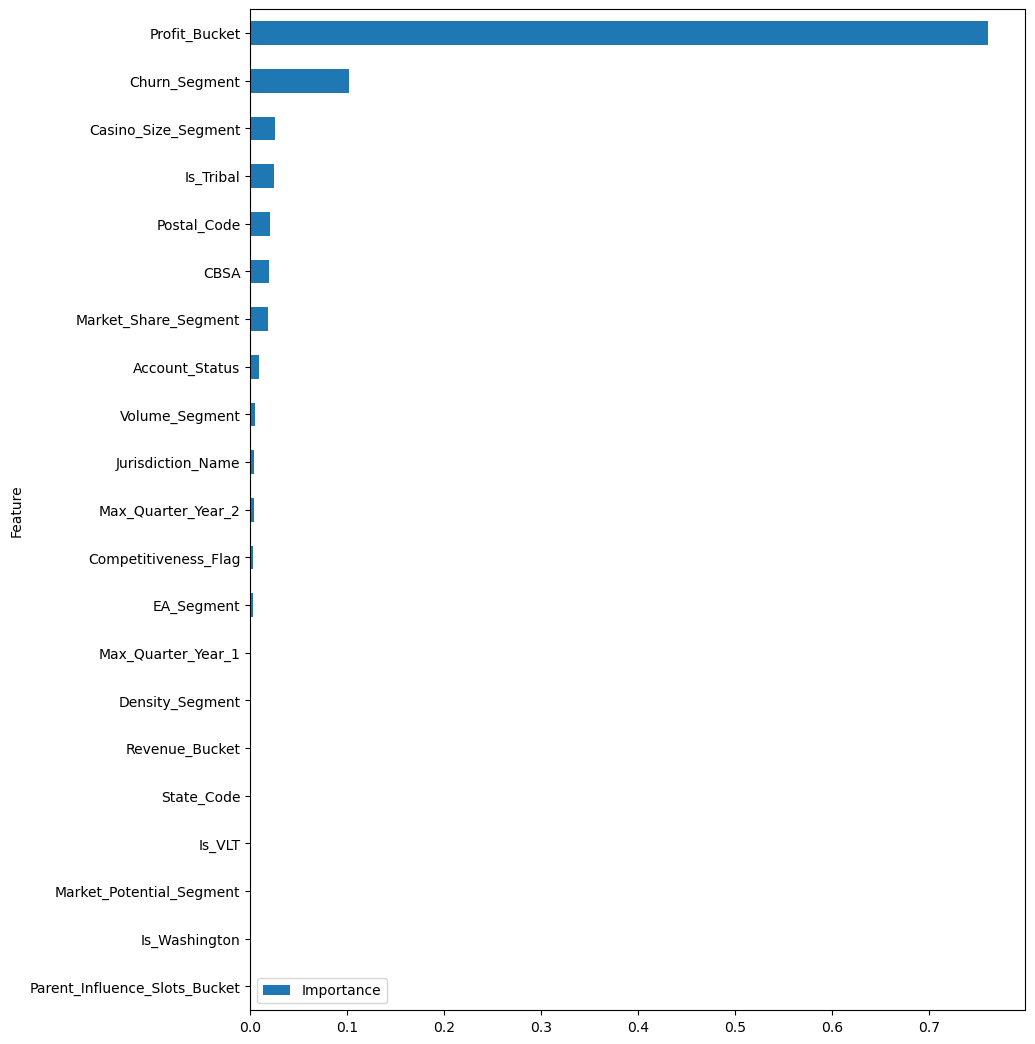

In [225]:
coefficients = dt.feature_importances_

feature_importance = pd.DataFrame({'Feature': imp_feat_cat, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 13))

In [224]:
feature_importance

,Feature,Importance
0,Account_Status,0.009045
18,Volume_Segment,0.009045
17,Competitiveness_Flag,0.009045
16,Churn_Segment,0.009045
15,Market_Potential_Segment,0.009045
14,Casino_Size_Segment,0.009045
13,Market_Share_Segment,0.009045
12,Profit_Bucket,0.009045
11,Revenue_Bucket,0.009045
19,Density_Segment,0.009045


# Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=6)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_train_pred_prob = rf.predict_proba(X_train)
y_test_pred = rf.predict(X_test)
y_test_pred_prob = rf.predict_proba(X_test)

print('Train')
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

Train
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1942
         1.0       0.92      0.85      0.89       818

    accuracy                           0.94      2760
   macro avg       0.93      0.91      0.92      2760
weighted avg       0.94      0.94      0.94      2760

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       648
         1.0       0.90      0.83      0.87       272

    accuracy                           0.92       920
   macro avg       0.92      0.90      0.91       920
weighted avg       0.92      0.92      0.92       920



# Gradient Boosting

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_train_pred = gb.predict(X_train)
y_train_pred_prob = gb.predict_proba(X_train)
y_test_pred = gb.predict(X_test)
y_test_pred_prob = gb.predict_proba(X_test)

print('Train')
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

Train
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1942
         1.0       0.93      0.85      0.89       818

    accuracy                           0.94      2760
   macro avg       0.94      0.91      0.92      2760
weighted avg       0.94      0.94      0.94      2760

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       648
         1.0       0.89      0.83      0.86       272

    accuracy                           0.92       920
   macro avg       0.91      0.90      0.90       920
weighted avg       0.92      0.92      0.92       920



# Segmenting customers 

In [230]:
df

,Customer_ID,Account_Status,Is_National_Account,Is_Washington,Is_Tribal,Is_VLT,State_Code,Postal_Code,Country,Jurisdiction_Name,CBSA,Seasonality_Segment,Max_Quarter_Year_1,Max_Quarter_Year_2,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Parent_Influence_Slots_Bucket,item_quantity,target,State_Code_treated,Postal_Code_treated,Jurisdiction_Name_treated,CBSA_treated,Account_Status_0.0,Account_Status_1.0,Account_Status_2.0,Account_Status_3.0,Account_Status_4.0,Account_Status_nan,Is_Washington_0.0,Is_Washington_1.0,Is_Washington_2.0,Is_Washington_nan,Is_Tribal_0.0,Is_Tribal_1.0,Is_Tribal_2.0,Is_Tribal_nan,Is_VLT_0.0,Is_VLT_1.0,Is_VLT_2.0,Is_VLT_nan,Max_Quarter_Year_1_0.0,Max_Quarter_Year_1_1.0,Max_Quarter_Year_1_2.0,Max_Quarter_Year_1_3.0,Max_Quarter_Year_1_4.0,Max_Quarter_Year_1_nan,Max_Quarter_Year_2_0.0,Max_Quarter_Year_2_1.0,Max_Quarter_Year_2_2.0,Max_Quarter_Year_2_3.0,Max_Quarter_Year_2_4.0,Max_Quarter_Year_2_nan,EA_Segment_0.0,EA_Segment_1.0,EA_Segment_2.0,EA_Segment_3.0,EA_Segment_nan,Revenue_Bucket_0.0,Revenue_Bucket_1.0,Revenue_Bucket_2.0,Revenue_Bucket_3.0,Revenue_Bucket_nan,Profit_Bucket_0.0,Profit_Bucket_1.0,Profit_Bucket_2.0,Profit_Bucket_3.0,Profit_Bucket_nan,Market_Share_Segment_0.0,Market_Share_Segment_1.0,Market_Share_Segment_2.0,Market_Share_Segment_3.0,Market_Share_Segment_nan,Casino_Size_Segment_0.0,Casino_Size_Segment_1.0,Casino_Size_Segment_2.0,Casino_Size_Segment_3.0,Casino_Size_Segment_nan,Market_Potential_Segment_0.0,Market_Potential_Segment_1.0,Market_Potential_Segment_2.0,Market_Potential_Segment_3.0,Market_Potential_Segment_4.0,Market_Potential_Segment_nan,Churn_Segment_0.0,Churn_Segment_1.0,Churn_Segment_2.0,Churn_Segment_3.0,Churn_Segment_nan,Competitiveness_Flag_0.0,Competitiveness_Flag_1.0,Competitiveness_Flag_nan,Volume_Segment_0.0,Volume_Segment_1.0,Volume_Segment_2.0,Volume_Segment_3.0,Volume_Segment_nan,Density_Segment_0.0,Density_Segment_1.0,Density_Segment_2.0,Density_Segment_3.0,Density_Segment_nan,Parent_Influence_Slots_Bucket_0.0,Parent_Influence_Slots_Bucket_1.0,Parent_Influence_Slots_Bucket_2.0,Parent_Influence_Slots_Bucket_nan
0,1,0,0,0,0,0,43,1008,8,0,192,2,4,4,2,3,3,3,3,3,3,1,1,1,1,0.0,0,10.0,0.0,10.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2,0,0,0,0,2,19,480,30,67,187,None,4,4,2,3,3,3,3,3,3,0,3,3,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,3,0,0,0,0,2,19,483,30,67,187,2,4,4,2,3,3,3,3,3,3,0,3,3,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,4,0,0,0,0,0,38,819,30,67,233,2,4,4,2,3,3,3,3,3,3,1,1,1,2,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5,0,0,0,0,0,38,796,30,67,233,2,4,4,2,3,3,3,3,3,3,1,1,1,2,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,3676,1,0,0,0,2,15,415,30,67,50,2,4,4,2,3,3,3,3,3,3,1,1,3,0,0.0,0,0.

In [231]:
X_train

,Account_Status,Is_Washington,Is_Tribal,Is_VLT,State_Code,Postal_Code,Jurisdiction_Name,CBSA,Max_Quarter_Year_1,Max_Quarter_Year_2,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Parent_Influence_Slots_Bucket
644,0.0,0.0,0.0,0.0,38.0,754.0,60.0,144.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0
3480,2.0,1.0,1.0,1.0,35.0,698.0,67.0,7.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,1.0,3.0,1.0
911,0.0,0.0,0.0,0.0,21.0,1041.0,43.0,192.0,4.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,0.0
828,0.0,0.0,2.0,0.0,25.0,351.0,49.0,39.0,4.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0
79,1.0,0.0,0.0,0.0,-999.0,1034.0,94.0,192.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,0.0,0.0,0.0,2.0,15.0,437.0,67.0,274.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0
564,0.0,0.0,2.0,0.0,5.0,881.0,11.0,155.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,3.0,-999.0,1.0
3022,2.0,1.0,1.0,1.0,42.0,570.0,67.0,275.0,4.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,2.0,-999.0,1.0
1581,0.0,0.0,0.0,0.0,6.0,648.0,15.0,71.0,3.0,2.0,-999.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,3.0,0.0


In [233]:
X_train1 = X_train.copy(deep= True)
X_test1 = X_test.copy(deep= True)

In [232]:
X_train1 = df

,Customer_ID,Account_Status,Is_National_Account,Is_Washington,Is_Tribal,Is_VLT,State_Code,Postal_Code,Country,Jurisdiction_Name,CBSA,Seasonality_Segment,Max_Quarter_Year_1,Max_Quarter_Year_2,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Parent_Influence_Slots_Bucket,item_quantity,target,State_Code_treated,Postal_Code_treated,Jurisdiction_Name_treated,CBSA_treated,Account_Status_0.0,Account_Status_1.0,Account_Status_2.0,Account_Status_3.0,Account_Status_4.0,Account_Status_nan,Is_Washington_0.0,Is_Washington_1.0,Is_Washington_2.0,Is_Washington_nan,Is_Tribal_0.0,Is_Tribal_1.0,Is_Tribal_2.0,Is_Tribal_nan,Is_VLT_0.0,Is_VLT_1.0,Is_VLT_2.0,Is_VLT_nan,Max_Quarter_Year_1_0.0,Max_Quarter_Year_1_1.0,Max_Quarter_Year_1_2.0,Max_Quarter_Year_1_3.0,Max_Quarter_Year_1_4.0,Max_Quarter_Year_1_nan,Max_Quarter_Year_2_0.0,Max_Quarter_Year_2_1.0,Max_Quarter_Year_2_2.0,Max_Quarter_Year_2_3.0,Max_Quarter_Year_2_4.0,Max_Quarter_Year_2_nan,EA_Segment_0.0,EA_Segment_1.0,EA_Segment_2.0,EA_Segment_3.0,EA_Segment_nan,Revenue_Bucket_0.0,Revenue_Bucket_1.0,Revenue_Bucket_2.0,Revenue_Bucket_3.0,Revenue_Bucket_nan,Profit_Bucket_0.0,Profit_Bucket_1.0,Profit_Bucket_2.0,Profit_Bucket_3.0,Profit_Bucket_nan,Market_Share_Segment_0.0,Market_Share_Segment_1.0,Market_Share_Segment_2.0,Market_Share_Segment_3.0,Market_Share_Segment_nan,Casino_Size_Segment_0.0,Casino_Size_Segment_1.0,Casino_Size_Segment_2.0,Casino_Size_Segment_3.0,Casino_Size_Segment_nan,Market_Potential_Segment_0.0,Market_Potential_Segment_1.0,Market_Potential_Segment_2.0,Market_Potential_Segment_3.0,Market_Potential_Segment_4.0,Market_Potential_Segment_nan,Churn_Segment_0.0,Churn_Segment_1.0,Churn_Segment_2.0,Churn_Segment_3.0,Churn_Segment_nan,Competitiveness_Flag_0.0,Competitiveness_Flag_1.0,Competitiveness_Flag_nan,Volume_Segment_0.0,Volume_Segment_1.0,Volume_Segment_2.0,Volume_Segment_3.0,Volume_Segment_nan,Density_Segment_0.0,Density_Segment_1.0,Density_Segment_2.0,Density_Segment_3.0,Density_Segment_nan,Parent_Influence_Slots_Bucket_0.0,Parent_Influence_Slots_Bucket_1.0,Parent_Influence_Slots_Bucket_2.0,Parent_Influence_Slots_Bucket_nan
0,1,0,0,0,0,0,43,1008,8,0,192,2,4,4,2,3,3,3,3,3,3,1,1,1,1,0.0,0,10.0,0.0,10.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2,0,0,0,0,2,19,480,30,67,187,None,4,4,2,3,3,3,3,3,3,0,3,3,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,3,0,0,0,0,2,19,483,30,67,187,2,4,4,2,3,3,3,3,3,3,0,3,3,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,4,0,0,0,0,0,38,819,30,67,233,2,4,4,2,3,3,3,3,3,3,1,1,1,2,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5,0,0,0,0,0,38,796,30,67,233,2,4,4,2,3,3,3,3,3,3,1,1,1,2,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,3676,1,0,0,0,2,15,415,30,67,50,2,4,4,2,3,3,3,3,3,3,1,1,3,0,0.0,0,0.

In [237]:
X_train['type'] = 'Train'
X_test['type'] = 'Test'

In [240]:
df_train = df.merge(X_train['type'], right_index=True, left_index=True, how = 'inner')

In [241]:
df_test = df.merge(X_test['type'], right_index=True, left_index=True, how = 'inner')

In [242]:
df_train

,Customer_ID,Account_Status,Is_National_Account,Is_Washington,Is_Tribal,Is_VLT,State_Code,Postal_Code,Country,Jurisdiction_Name,CBSA,Seasonality_Segment,Max_Quarter_Year_1,Max_Quarter_Year_2,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Parent_Influence_Slots_Bucket,item_quantity,target,State_Code_treated,Postal_Code_treated,Jurisdiction_Name_treated,CBSA_treated,Account_Status_0.0,Account_Status_1.0,Account_Status_2.0,Account_Status_3.0,Account_Status_4.0,Account_Status_nan,Is_Washington_0.0,Is_Washington_1.0,Is_Washington_2.0,Is_Washington_nan,Is_Tribal_0.0,Is_Tribal_1.0,Is_Tribal_2.0,Is_Tribal_nan,Is_VLT_0.0,Is_VLT_1.0,Is_VLT_2.0,Is_VLT_nan,Max_Quarter_Year_1_0.0,Max_Quarter_Year_1_1.0,Max_Quarter_Year_1_2.0,Max_Quarter_Year_1_3.0,Max_Quarter_Year_1_4.0,Max_Quarter_Year_1_nan,Max_Quarter_Year_2_0.0,Max_Quarter_Year_2_1.0,Max_Quarter_Year_2_2.0,Max_Quarter_Year_2_3.0,Max_Quarter_Year_2_4.0,Max_Quarter_Year_2_nan,EA_Segment_0.0,EA_Segment_1.0,EA_Segment_2.0,EA_Segment_3.0,EA_Segment_nan,Revenue_Bucket_0.0,Revenue_Bucket_1.0,Revenue_Bucket_2.0,Revenue_Bucket_3.0,Revenue_Bucket_nan,Profit_Bucket_0.0,Profit_Bucket_1.0,Profit_Bucket_2.0,Profit_Bucket_3.0,Profit_Bucket_nan,Market_Share_Segment_0.0,Market_Share_Segment_1.0,Market_Share_Segment_2.0,Market_Share_Segment_3.0,Market_Share_Segment_nan,Casino_Size_Segment_0.0,Casino_Size_Segment_1.0,Casino_Size_Segment_2.0,Casino_Size_Segment_3.0,Casino_Size_Segment_nan,Market_Potential_Segment_0.0,Market_Potential_Segment_1.0,Market_Potential_Segment_2.0,Market_Potential_Segment_3.0,Market_Potential_Segment_4.0,Market_Potential_Segment_nan,Churn_Segment_0.0,Churn_Segment_1.0,Churn_Segment_2.0,Churn_Segment_3.0,Churn_Segment_nan,Competitiveness_Flag_0.0,Competitiveness_Flag_1.0,Competitiveness_Flag_nan,Volume_Segment_0.0,Volume_Segment_1.0,Volume_Segment_2.0,Volume_Segment_3.0,Volume_Segment_nan,Density_Segment_0.0,Density_Segment_1.0,Density_Segment_2.0,Density_Segment_3.0,Density_Segment_nan,Parent_Influence_Slots_Bucket_0.0,Parent_Influence_Slots_Bucket_1.0,Parent_Influence_Slots_Bucket_2.0,Parent_Influence_Slots_Bucket_nan,type
1,2,0,0,0,0,2,19,480,30,67,187,None,4,4,2,3,3,3,3,3,3,0,3,3,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,Train
2,3,0,0,0,0,2,19,483,30,67,187,2,4,4,2,3,3,3,3,3,3,0,3,3,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,Train
4,5,0,0,0,0,0,38,796,30,67,233,2,4,4,2,3,3,3,3,3,3,1,1,1,2,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,Train
5,6,0,0,0,0,0,38,731,30,67,144,2,4,4,2,3,3,3,3,3,3,1,1,1,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,Train
7,8,0,0,0,0,2,19,499,30,37,140,2,4,4,2,3,3,3,3,3,3,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,3675,1,0,0,0,0,40,1028,23,67,

In [243]:
df_train['score_lr'] = [i[1]*100 for i in lr.predict_proba(df_train[lr_imp_cols1])]
df_test['score_lr'] = [i[1]*100 for i in lr.predict_proba(df_test[lr_imp_cols1])]

<Axes: xlabel='score_lr', ylabel='Count'>

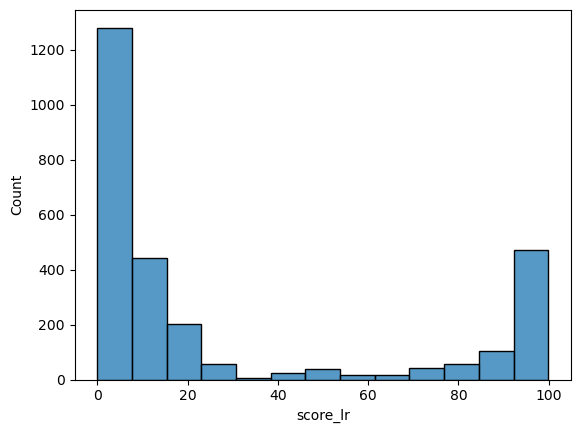

In [245]:
sns.histplot(df_train['score_lr'])

<Axes: xlabel='score_lr', ylabel='Count'>

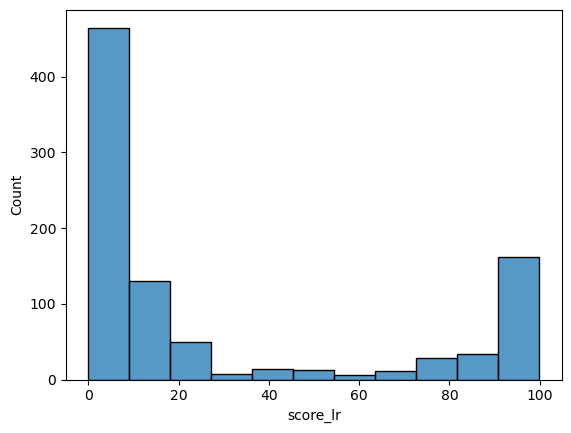

In [246]:
sns.histplot(df_test['score_lr'])

In [247]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    from colorama import Fore
    print(Fore.GREEN + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

ks_info = ks(data=df_train,target="target", prob="score_lr")
ks_df = pd.DataFrame(ks_info)
ks_df

C:\Users\HP\AppData\Local\Temp\ipykernel_21404\3035715175.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kstable['min_prob'] = grouped.min()[prob]


KS is 80.0% at decile 3


C:\Users\HP\AppData\Local\Temp\ipykernel_21404\3035715175.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kstable['max_prob'] = grouped.max()[prob]
C:\Users\HP\AppData\Local\Temp\ipykernel_21404\3035715175.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kstable['events']   = grouped.sum()[target]
C:\Users\HP\AppData\Local\Temp\ipykernel_21404\3035715175.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,98.168423,99.905775,273,3,33.37%,0.15%,33.37%,0.15%,33.2
2,86.853831,98.144372,254,17,31.05%,0.88%,64.43%,1.03%,63.4
3,25.575169,86.806227,171,83,20.90%,4.27%,85.33%,5.30%,80.0
4,12.791306,25.302158,69,230,8.44%,11.84%,93.77%,17.15%,76.6
5,8.525314,12.390093,19,222,2.32%,11.43%,96.09%,28.58%,67.5
6,3.928676,8.226619,11,218,1.34%,11.23%,97.43%,39.80%,57.6
7,3.281363,3.887967,15,338,1.83%,17.40%,99.27%,57.21%,42.1
8,0.586052,3.203971,6,260,0.73%,13.39%,100.00%,70.60%,29.4
9,0.108926,0.567915,0,293,0.00%,15.09%,100.00%,85.68%,14.3


In [254]:
ks_df['class_event'] = ks_df['events']/(ks_df['events']+ ks_df['nonevents'])
ks_df['class_nonevent'] = ks_df['nonevents']/(ks_df['events']+ ks_df['nonevents'])

In [255]:
ks_df

,min_prob,max_prob,events,nonevents,...,cum_noneventrate,KS,class_event,class_nonevent
Decile,,,,,,,,,
1,98.168423,99.905775,273,3,...,0.15%,33.2,0.989130,0.010870
2,86.853831,98.144372,254,17,...,1.03%,63.4,0.937269,0.062731
3,25.575169,86.806227,171,83,...,5.30%,80.0,0.673228,0.326772
4,12.791306,25.302158,69,230,...,17.15%,76.6,0.230769,0.769231
5,8.525314,12.390093,19,222,...,28.58%,67.5,0.078838,0.921162
6,3.928676,8.226619,11,218,...,39.80%,57.6,0.048035,0.951965
7,3.281363,3.887967,15,338,...,57.21%,42.1,0.042493,0.957507
8,0.586052,3.203971,6,260,...,70.60%,29.4,0.022556,0.977444
9,0.108926,0.567915,0,293,...,85.68%,14.3,0.000000,1.000000


In [ ]:
# We can consider 
# High propentity for top 2 deciles as the event rate is more than 90%
# Low propensity for bottom 6 deciles as the noneventrate is more than 95% there
# Rest could be considerede as Medium propendity

# Outlier treatment

In [260]:
def iqr(x):
    return x.quantile(q=0.75) - x.quantile(q=0.25)

def outlier_count(x):
    upper_out = x.quantile(q=0.75) + 1.5 * iqr(x)
    lower_out = x.quantile(q=0.25) - 1.5 * iqr(x)

    return len(x[x > upper_out]) + len(x[x < lower_out]), upper_out, lower_out


In [261]:
outlier_count(df['item_quantity'])

(688, 10.0, -6.0)

C:\Users\HP\AppData\Local\Temp\ipykernel_21404\2731015511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['item_quantity'])


<Axes: xlabel='item_quantity', ylabel='Density'>

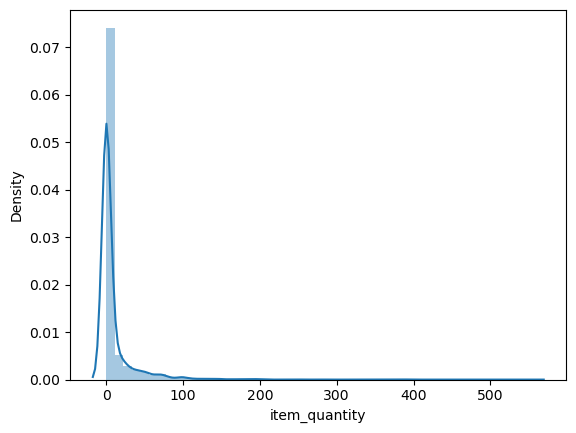

In [265]:
sns.distplot(df['item_quantity'])

In [266]:
df['item_quantity'].describe()

count    3680.000000
mean        9.682609
std        29.937306
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       552.000000
Name: item_quantity, dtype: float64

In [269]:
d = pd.DataFrame(range(552), columns=['a'])

In [271]:
d['b'] = d['a']+1

In [276]:
for i in range(d.shape[0]):
    d.loc[(d['a']==i),'count'] = df[(df['item_quantity']>i) & (df['item_quantity']<=i+1)].shape[0]

In [281]:
l = list(d['count'])

In [283]:
l.pop(0)

45.0

In [285]:
l.append(0)

In [287]:
d['count_1'] = l

In [288]:
d

,a,b,count,count_1
0,0,1,45.0,68.0
1,1,2,68.0,20.0
2,2,3,20.0,71.0
3,3,4,71.0,32.0
4,4,5,32.0,43.0
...,...,...,...,...
547,547,548,0.0,0.0
548,548,549,0.0,0.0
549,549,550,0.0,0.0
550,550,551,0.0,1.0


In [289]:
d['slope'] = (d['count']-d['count_1'])/d['count']

In [290]:
d['slope'].describe()

count    184.000000
mean           -inf
std             NaN
min            -inf
25%       -1.208333
50%        0.000000
75%        0.635417
max        1.000000
Name: slope, dtype: float64

In [295]:
d['slope'] = d['slope'].replace([np.inf, np.nan, -np.inf], 0)

<Axes: xlabel='slope', ylabel='Count'>

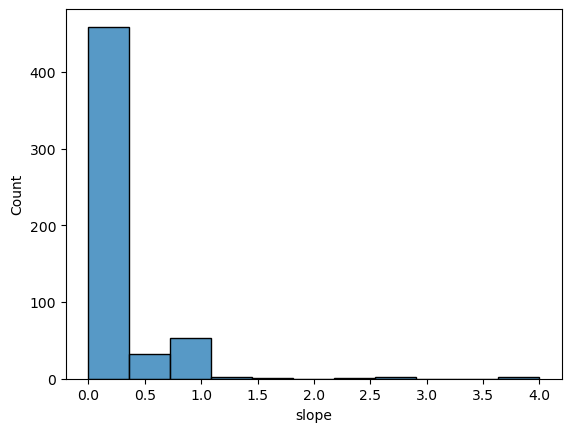

In [299]:
sns.histplot(np.abs(d['slope']))#.describe()

In [300]:
d[np.abs(d['slope'])>3.5]

,a,b,count,count_1,slope
62,62,63,1.0,5.0,-4.0
67,67,68,1.0,5.0,-4.0


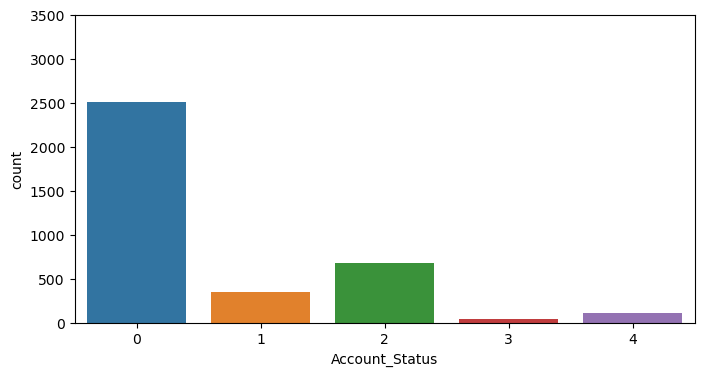

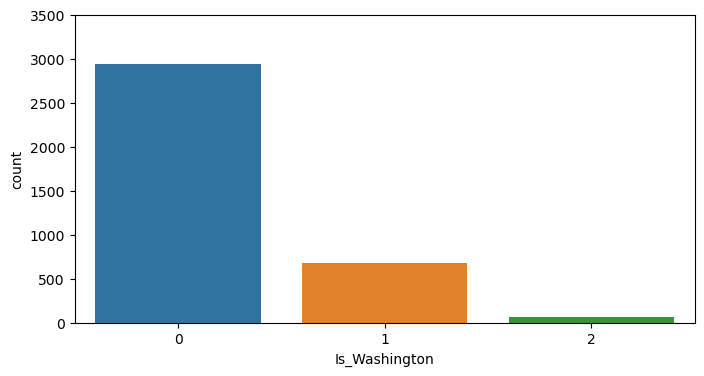

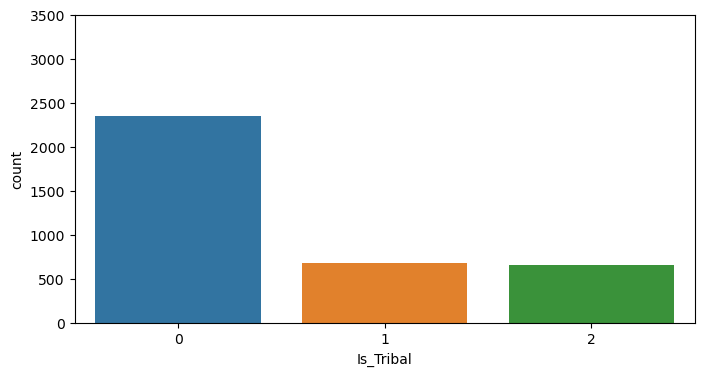

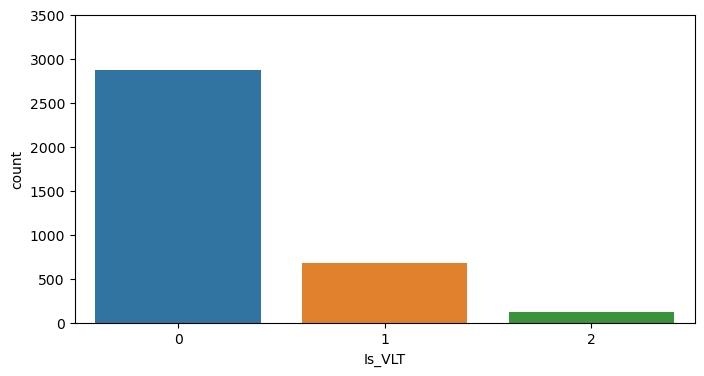

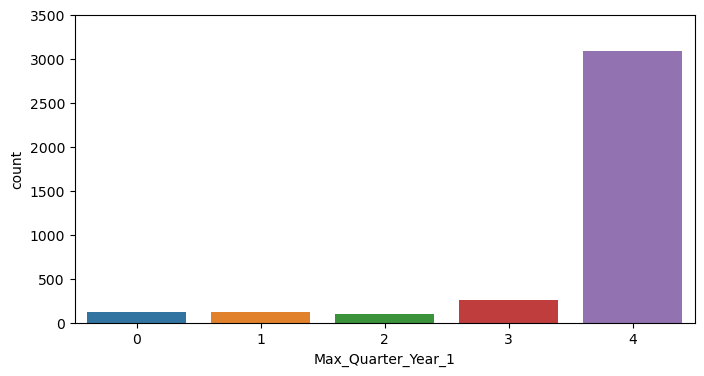

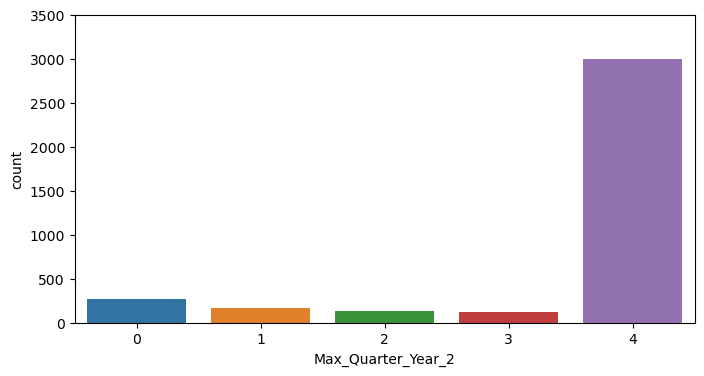

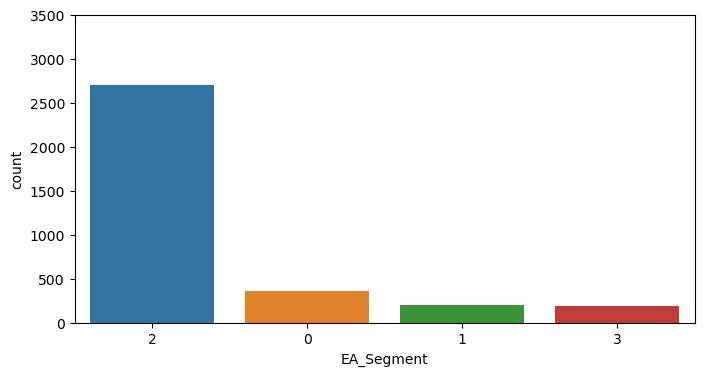

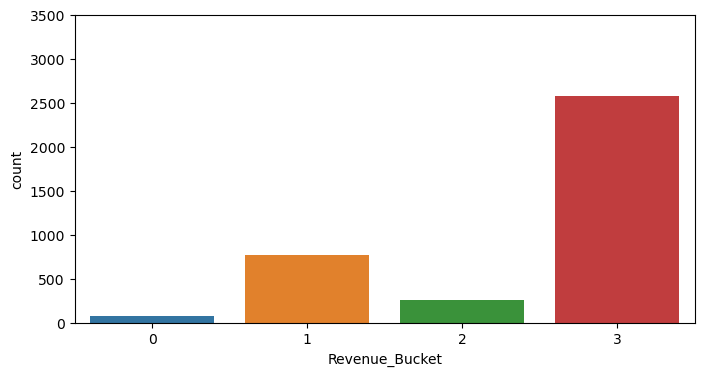

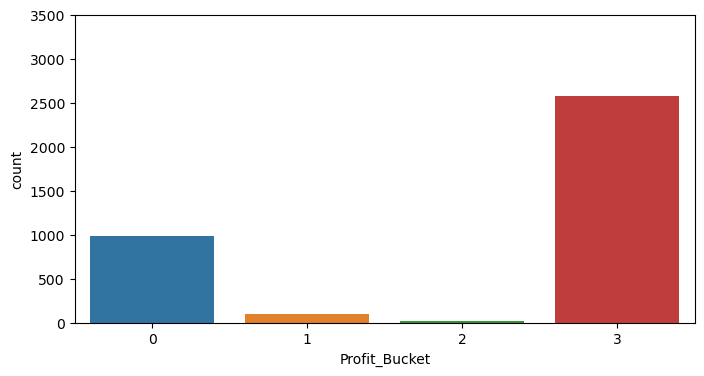

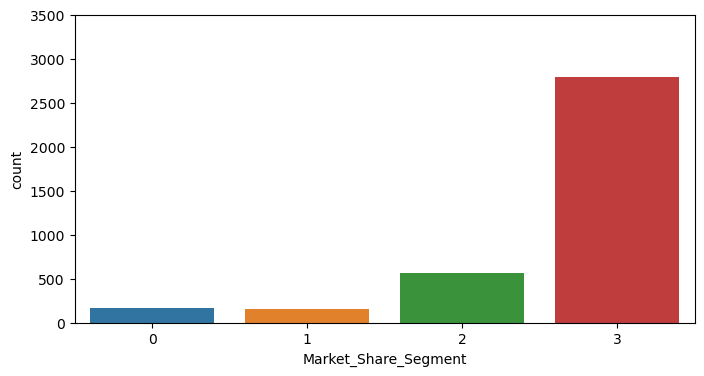

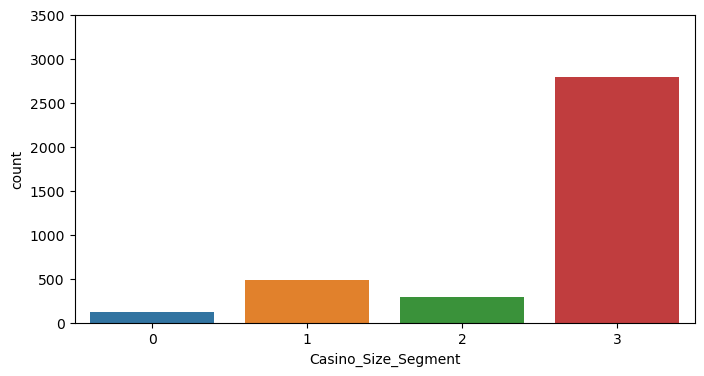

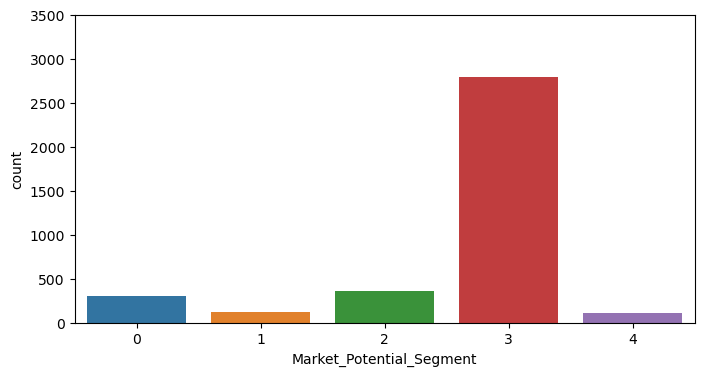

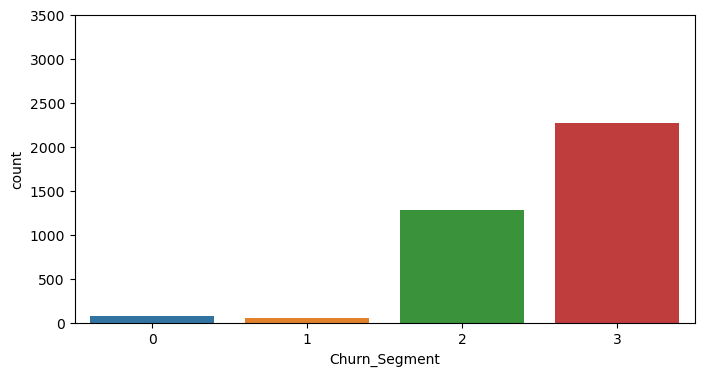

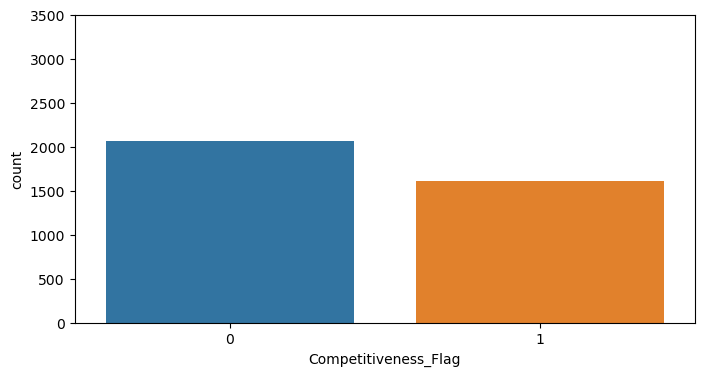

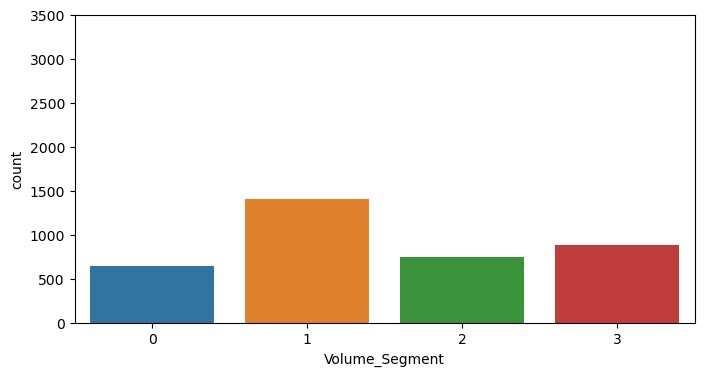

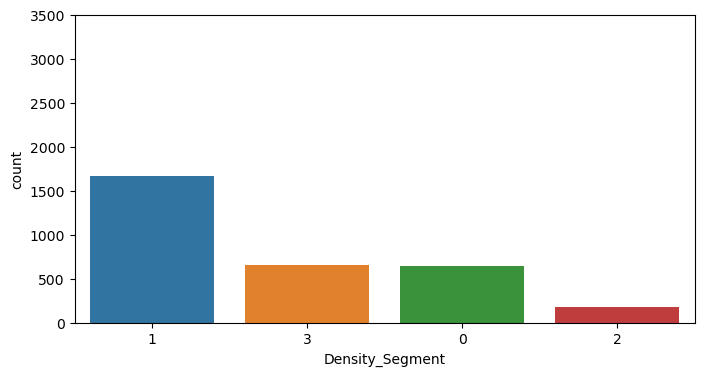

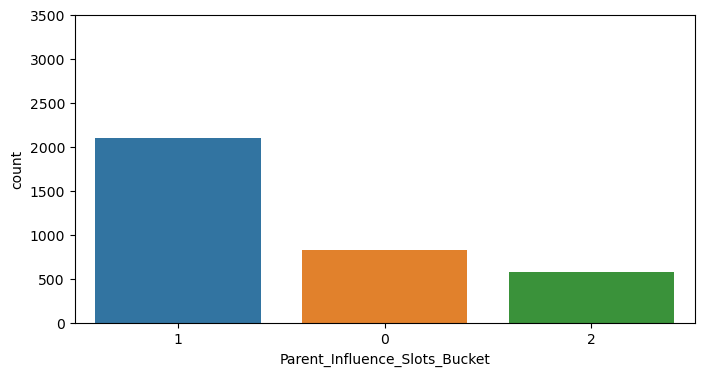

In [264]:
for i in imp_feat_cat_low:
    f, ax = plt.subplots(figsize=(8, 4))
    fig = sns.countplot(x=i, data=df)
    fig.axis(ymin=0, ymax=3500)